
# **Introduction**

This task involves predicting a cyclist's power output relative to their Peak Power Output (PPO), expressed as a percentage, during a 20 km time trial. This predictive modeling effort aims to uncover how various performance metrics influence an athlete’s ability to sustain power close to their maximum capacity, a critical factor in cycling performance.

The dataset used for this task is the athlete cycling performance dataset, the "20TT_Deidentified.csv" file. This dataset contains detailed records from 30 trained cyclists each having 40 records, split into Feedback (FB) and No Feedback (NFB) groups, and includes metrics such as Cadence, Heart Rate (HR), Distance, Condition, Trial, Power, PPO, Power relative to PPO, Max HR, and HR percent max. These variables provide a good foundation for analyzing physiological and performance dynamics across multiple trials, making it an ideal resource for building a predictive model.

The analysis used in this project follows a multi-step approach:
- Dataset Review and Preprocessing: The dataset’s structure was examined, and the data was cleaned and preprocessed to ensure accuracy and consistency, addressing any missing or error entries.
- Feature and Target Definition: The target variable, `Power_relative_to_PPO`, was defined for prediction, with independent variables including Cadence, HR, Distance, Condition, and Trial serving as features.
- Exploratory Data Analysis (EDA): Relationships between variables were explored to identify patterns, correlations, and insights into factors influencing power output.
- Model Selection and Building: Various predictive models were tested to determine the most effective approach for estimating relative power output.
- Model Refinement: Models were fine-tuned to optimize prediction accuracy and reliability, ensuring good performance across various conditions.

The primary purpose of this task is to develop a predictive model that estimates power relative to PPO based on the provided metrics. This model serves multiple objectives: understanding how variables like cadence and heart rate impact performance, assessing the role of real-time feedback in maintaining power output, optimizing pacing strategies, and evaluating effort and fatigue dynamics across a 20 km time trial.

Several key achievements can be expected from this analysis:
- Accurate Predictive Model: A reliable model for predicting power relative to PPO, enabling precise performance forecasting.
- Performance Insights: Identification of critical factors such as Cadence, HR that drive power output, offering a deeper understanding of cyclist performance.
- Feedback Effectiveness: Insights into differences between FB and NFB groups, revealing whether feedback enhances power consistency or magnitude.
- Training Optimization: Detection of key performance indicators that can guide training adjustments and pacing strategies.

This analysis offers significant benefits for cycling athletes seeking to enhance their performance. By predicting power relative to PPO, athletes and coaches can:
- Optimize Training Focus: Identify and target the most impactful metrics such as increasing cadence if it strongly correlates with power, improving training efficiency.
- Refine Pacing Strategies: Use model predictions to maintain optimal power output over distance, preventing premature fatigue in races.
- Leverage Feedback: Understand the value of real-time feedback, allowing for tailored training environments that maximize performance.
- Manage Effort and Fatigue: Monitor relative power to detect fatigue patterns, enabling better effort allocation and recovery planning.

In summary, this task gets data-driven insights to empower cycling athletes with personalized, actionable strategies, ultimately elevating their competitive edge and endurance in 20 km time trials.




# **DATA PROCESSING AND CLEANING**

### Load Data and Initial Exploratory Data Analysis (EDA)

In this section, I begin by loading the **20TT\_Deidentified.csv** athlete cycling dataset into a Pandas DataFrame and take a first look at its overall structure. I will explore key aspects like its shape, column names, and data types, while also previewing the first few rows to get a sense of the content. Basic statistics help summarize the numerical data, and I will check for any missing values or duplicates. Lastly, I will look at how varied each column is by counting unique values, for further analysis.


In [1]:
import pandas as pd

# Load the dataset
data_csv = pd.read_csv("/content/20TT_Deidentified.csv")

# Display dataset information
print("\nDataset Information:")
data_csv.info()

# Display dataset shape
print("\nDataset Shape:", data_csv.shape)

# Display column names
print("\nColumn Names:")
print(data_csv.columns.tolist())

# Display first 10 rows
print("\nFirst 10 Rows:")
display(data_csv.head(10))

# Display summary statistics
print("\nSummary Statistics:")
display(data_csv.describe())

# Check for missing values
print("\nMissing Values:")
display(data_csv.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", data_csv.duplicated().sum())

# Display unique values count per column
print("\nUnique Values Per Column:")
display(data_csv.nunique())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Participant            1200 non-null   int64  
 1   Condition_name         600 non-null    object 
 2   Condition              1200 non-null   int64  
 3   Trial                  1200 non-null   int64  
 4   Distance               1200 non-null   int64  
 5   Power                  1200 non-null   float64
 6   Cadence                1200 non-null   float64
 7   HR                     1130 non-null   float64
 8   PPO                    1200 non-null   int64  
 9   Power_relative_to_PPO  1200 non-null   float64
 10  Max_HR                 1160 non-null   float64
 11  HR_percent_max         1090 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 112.6+ KB

Dataset Shape: (1200, 12)

Column Names:
['Participant', 'Condition_name', 'Co

,Participant,Condition_name,Condition,Trial,Distance,Power,Cadence,HR,PPO,Power_relative_to_PPO,Max_HR,HR_percent_max
0,7,FB,1,2,1,278.387661,88.968692,144.0,438,63.56,199.0,72.361809
1,7,FB,1,2,2,292.240750,90.749159,151.0,438,66.72,199.0,75.879397
2,7,FB,1,1,1,284.804095,96.757096,160.0,438,65.02,199.0,80.402010
3,7,FB,1,2,3,296.814056,91.160566,160.0,438,67.77,199.0,80.402010
4,7,FB,1,2,4,295.691226,90.980611,163.0,438,67.51,199.0,81.909548
5,7,FB,1,1,2,330.427282,94.895687,167.0,438,75.44,199.0,83.919598
6,7,FB,1,2,5,287.956190,91.828571,167.0,438,65.74,199.0,83.919598
7,7,FB,1,2,7,272.877845,97.551324,168.0,438,62.30,199.0,84.422111
8,7,FB,1,1,3,292.641013,98.042377,169.0,438,66.81,199.0,84.924623
9,7,FB,1,1,4,278.850262,99.673343,169.0,438,63.66,199.0,84.924623



Summary Statistics:


,Participant,Condition,Trial,Distance,Power,Cadence,HR,PPO,Power_relative_to_PPO,Max_HR,HR_percent_max
count,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1130.000000,1200.000000,1200.000000,1160.000000,1090.000000
mean,15.50000,1.500000,1.500000,10.500000,255.973238,94.812529,171.031858,381.066667,67.062317,188.206897,90.984593
std,8.65905,0.500208,0.500208,5.768685,62.373673,9.309134,14.205778,75.636607,8.251532,9.252957,5.961725
min,1.00000,1.000000,1.000000,1.000000,134.508008,65.267094,116.000000,220.000000,43.870000,169.000000,63.387978
25%,8.00000,1.000000,1.000000,5.750000,207.927410,90.878659,163.000000,306.000000,61.720000,183.000000,87.845703
50%,15.50000,1.500000,1.500000,10.500000,256.506174,96.768259,172.000000,387.500000,66.880000,185.000000,91.666667
75%,23.00000,2.000000,2.000000,15.250000,303.533636,100.639233,180.000000,450.000000,72.112500,194.000000,95.081967
max,30.00000,2.000000,2.000000,20.000000,491.532653,121.450642,207.000000,484.000000,103.480000,206.000000,104.040404



Missing Values:


,0
Participant,0
Condition_name,600
Condition,0
Trial,0
Distance,0
Power,0
Cadence,0
HR,70
PPO,0
Power_relative_to_PPO,0



Number of Duplicate Rows: 0

Unique Values Per Column:


,0
Participant,30
Condition_name,1
Condition,2
Trial,2
Distance,20
Power,1140
Cadence,1140
HR,83
PPO,26
Power_relative_to_PPO,994


The cycling dataset includes 30 participants with each having 40 records across 2 conditions and 2 trials, totaling 1200 rows and 12 columns. No duplicate entries were found. However, there are missing values in HR (70), Max\_HR (40), and HR\_percent\_max (110), which need imputation or exclusion. Summary statistics reveal meaningful metrics like Power\_relative\_to\_PPO and HR\_percent\_max, which could be essential for performance insights. The next step involves handling missing data and exploring key distributions for further analysis.


### Handling Missing Values






In this section, I will handle the missing values to prepare the dataset for reliable analysis. Numerical columns like HR, Max_HR, and HR_percent_max are filled using their respective medians to maintain central tendency without distortion. For the categorical column Condition_name, missing entries are replaced with a default label 'NFB'. After these steps, I will verify the dataset to ensure all missing values have been successfully addressed, resulting in a complete and clean dataset ready for further exploration.

In [2]:
# Fill missing values with the median of the columns
data_csv.loc[data_csv['HR'].isnull(), 'HR'] = data_csv['HR'].median()
data_csv.loc[data_csv['Max_HR'].isnull(), 'Max_HR'] = data_csv['Max_HR'].median()
data_csv.loc[data_csv['HR_percent_max'].isnull(), 'HR_percent_max'] = data_csv['HR_percent_max'].median()

# Fill missing values in 'Condition_name' with 'NFB'
data_csv['Condition_name'] = data_csv['Condition_name'].fillna('NFB')

# Verifying that missing values are filled
print("\nMissing Values:")
display(data_csv.isnull().sum())


Missing Values:


,0
Participant,0
Condition_name,0
Condition,0
Trial,0
Distance,0
Power,0
Cadence,0
HR,0
PPO,0
Power_relative_to_PPO,0


After handling missing values, all gaps in HR (70), Max\_HR (40), and HR\_percent\_max (110) were successfully filled using median values, preserving the central trends without being skewed by outliers. Condition_name missing entries were set to 'NFB', aligning with the dataset's context of comparing feedback (FB) and no-feedback (NFB) conditions. A check confirmed that no missing values remain in the dataset. Usually median is a most common and straight forward choice for imputation.


### Encoding Categorical Variables Using Label Encoding

This part focuses on preparing the **Condition\_name** column for machine learning by converting its categorical values into numerical form. Using LabelEncoder, I will transform 'FB' to 0 and 'NFB' to 1, ensuring models can process the data effectively. To maintain transparency, the encoding mapping is clearly defined, and i will verify the transformation by checking the encoded values for random participants. This step ensures both interpretability and compatibility with ML algorithms.


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Condition_name' metric to numeric (FB (Feedback) = 0, NFB (No Feedback) = 1)
data_csv['Condition_name'] = label_encoder.fit_transform(data_csv['Condition_name'])

# Clarify encoding mapping
print("\nNote: 'FB (Feedbac)' is encoded as 0 and 'NFB (No Feedback)' is encoded as 1")

# Verify the encoding
print("\nEncoded 'Condition_name' for participants 7 and 16:")
print(data_csv.loc[data_csv['Participant'].isin([7, 16]), ['Participant', 'Condition_name']])



Note: 'FB (Feedbac)' is encoded as 0 and 'NFB (No Feedback)' is encoded as 1

Encoded 'Condition_name' for participants 7 and 16:
     Participant  Condition_name
0              7               0
1              7               0
2              7               0
3              7               0
4              7               0
..           ...             ...
155           16               1
156           16               1
157           16               1
158           16               1
159           16               1

[80 rows x 2 columns]


The output shows that the encoding was successful. For Participant 7, who was originally under the FB (Feedback) condition, the Condition_name is now 0, and for Participant 16, originally under no feedback (now filled as NFB), it is 1. This binary encoding (0 for FB, 1 for NFB) aligns with the dataset's structure, where half the entries were FB and the other half, after filling, are NFB. The transformation ensures that the Condition_name column is now numeric, making it suitable for modeling while preserving the distinction between feedback conditions.

### Feature Scaling Using StandardScale

This part standardizes key numerical features to ensure they are on the same scale, which is important for machine learning models that are sensitive to feature magnitudes. Using **StandardScaler**, columns like Power, Cadence, HR, PPO, Max\_HR, and HR\_percent\_max are transformed to have a mean of 0 and standard deviation of 1. After scaling, the first few rows are checked to confirm that the transformation was successful, with values now centered around zero—ready for efficient model training.


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# list of numerical columns to scale
numerical_cols = ['Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']

# Scale the numerical columns
data_csv[numerical_cols] = scaler.fit_transform(data_csv[numerical_cols])

# Verifying that the features are scaled
print("\nScaled Data:")
display(data_csv[numerical_cols].head())


Scaled Data:


,Distance,Power,Cadence,HR,PPO,Max_HR,HR_percent_max
0,-1.647509,0.359507,-0.628015,-1.965631,0.753036,1.196262,-3.288095
1,-1.474087,0.581698,-0.436675,-1.457685,0.753036,1.196262,-2.669097
2,-1.647509,0.462421,0.208975,-0.804611,0.753036,1.196262,-1.873243
3,-1.300665,0.655050,-0.392462,-0.804611,0.753036,1.196262,-1.873243
4,-1.127243,0.637040,-0.411802,-0.586920,0.753036,1.196262,-1.607958


The numerical features were successfully standardized using **StandardScaler**, bringing them to a common scale with a mean of 0 and standard deviation of 1. The first five rows confirm this, showing a balanced mix of positive and negative values across columns like Power, Cadence, and HR\_percent\_max, reflecting their deviation from the mean. This transformation ensures that all features contribute equally during model training, especially for scale-sensitive algorithms like SVM, neural networks, or PCA. Overall, the scaling appears consistent and effective, lead to good foundation for reliable model performance.


# **DESCRIPTIVE STATISTICS AND VISUAL EXPLORATION**

### Statistical Analysis of Power Relative to PPO and Correlation Visualization of the dataset.

The objective of this step is to perform a statistical analysis of the Power_relative_to_PPO variable and visualize the correlations between all variables in the dataset to understand their relationships. The purpose is to identify key statistical measures such as mean, median, variance, skewness, and kurtosis for Power relative to PPO, as well as to detect potential outliers using the interquartile range (IQR). Additionally, a correlation heatmap will help uncover relationships between variables like Power, Cadence, HR, and PPO, which are critical for predicting Power relative to PPO. The techniques include calculating descriptive statistics using pandas, computing skewness and kurtosis with scipy, and visualizing correlations with a seaborn heatmap. The method involves aggregating these statistics and plotting the heatmap with annotated correlation coefficients to facilitate interpretation.


Statistical Measures for Power_relative_to_PPO:
Mean: 67.06
Median: 66.88
Standard Deviation: 8.25
Variance: 68.09
Interquartile Range (IQR): 10.39
Skewness: 0.42
Kurtosis: 0.97
Lower Bound (Outlier Range): 46.13
Upper Bound (Outlier Range): 87.70


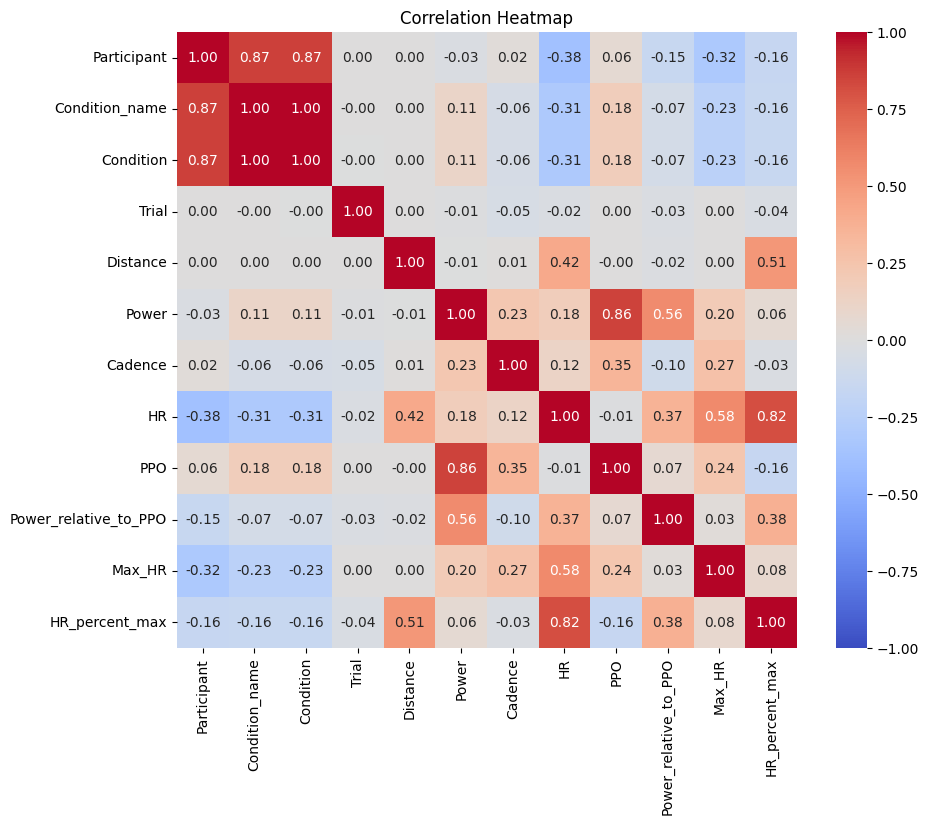

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn


# Calculate statistics for 'Power_relative_to_PPO'
power_stats = data_csv['Power_relative_to_PPO'].describe()

# Calculate IQR (Interquartile Range)
Q1 = data_csv['Power_relative_to_PPO'].quantile(0.25)
Q3 = data_csv['Power_relative_to_PPO'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Skewness and Kurtosis
skewness = skew(data_csv['Power_relative_to_PPO'])
kurt = kurtosis(data_csv['Power_relative_to_PPO'])

# Print all calculated statistics
print("\nStatistical Measures for Power_relative_to_PPO:")
print(f"Mean: {power_stats['mean']:.2f}")
print(f"Median: {power_stats['50%']:.2f}")
print(f"Standard Deviation: {power_stats['std']:.2f}")
print(f"Variance: {power_stats['std']**2:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")
print(f"Lower Bound (Outlier Range): {lower_bound:.2f}")
print(f"Upper Bound (Outlier Range): {upper_bound:.2f}")

# Plot the correlation heatmap
correlation_matrix = data_csv.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

The results provides a detailed statistical summary of Power relative to PPO, showing a mean of 67.06 and a median of 66.88, indicating a near-symmetric distribution, which is further supported by a skewness of 0.42 (slightly right-skewed) and a kurtosis of 0.97 (slightly peaked but close to normal). The standard deviation is 8.25, with a variance of 68.09, reflecting moderate variability in the cyclists' power output relative to their peak power. The IQR is 10.39, and the outlier range (46.13 to 87.70) suggests that values outside this range, such as those near the dataset's max of 103.48, may be outliers. The correlation heatmap reveals strong positive correlations, such as between Power and Power_relative_to_PPO (0.56) and Power and PPO (0.86), indicating that higher peak power outputs (PPO) are associated with higher power outputs. HR_percent_max and HR (0.82) also show a strong correlation, as expected, since HR_percent_max is derived from HR. Condition_name (FB vs. NFB) has weak correlations with most variables (e.g., 0.11 with Power), suggesting feedback may not strongly influence these metrics directly.

### Grouped Statistical Analysis and Boxplot Visualization of Power relative to PPO and conditions

The objective here is to conduct a grouped statistical analysis of Power relative to PPO by Condition (FB vs. NFB) and visualize the distribution using a boxplot. The purpose is to compare how power output relative to PPO differs between feedback and no-feedback conditions, focusing on central tendency, spread, and potential outliers. The technique involves calculating descriptive statistics (quartiles, IQR, and outlier bounds) for each condition using pandas' groupby and visualizing the results with a seaborn boxplot. The method includes computing the IQR and outlier ranges for each group to identify differences in variability and distribution.


Calculated Statistics (IQR, Median, Outliers Range):
                   25%    50%      75%      IQR  Lower Bound  Upper Bound
Condition_name                                                           
0               62.860  67.08  72.0325   9.1725     49.10125     85.79125
1               59.365  66.51  72.5500  13.1850     39.58750     92.32750


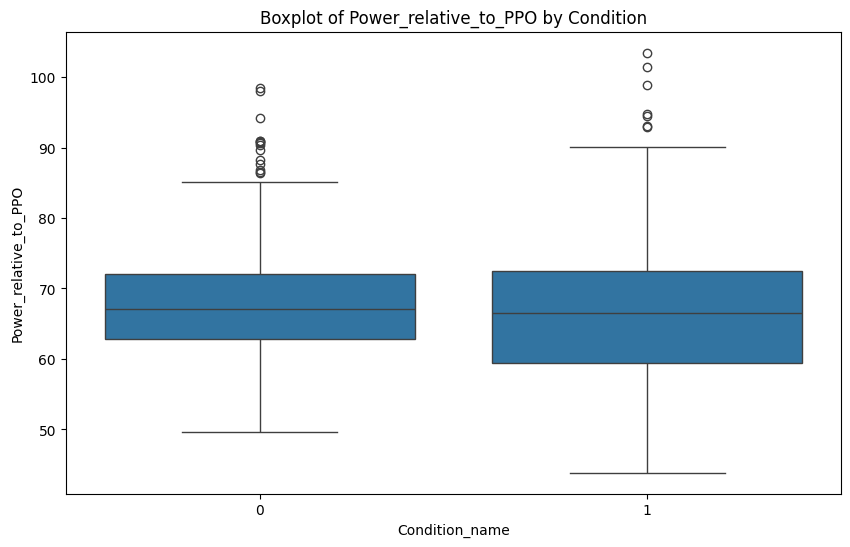

In [6]:
import numpy as np

# Calculate the statistics for each 'Condition_name'
iqr_stats = data_csv.groupby('Condition_name')['Power_relative_to_PPO'].describe(percentiles=[.25, .5, .75])
iqr_stats['IQR'] = iqr_stats['75%'] - iqr_stats['25%']
iqr_stats['Lower Bound'] = iqr_stats['25%'] - 1.5 * iqr_stats['IQR']
iqr_stats['Upper Bound'] = iqr_stats['75%'] + 1.5 * iqr_stats['IQR']

# Display the calculated statistics
print("\nCalculated Statistics (IQR, Median, Outliers Range):")
print(iqr_stats[['25%', '50%', '75%', 'IQR', 'Lower Bound', 'Upper Bound']])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition_name', y='Power_relative_to_PPO', data=data_csv)
plt.title("Boxplot of Power_relative_to_PPO by Condition")
plt.show()


The output shows that for Condition 0 (FB), the median Power relative to PPO is 67.08, with an IQR of 9.17, while for Condition 1 (NFB), the median is slightly lower at 66.51, but with a larger IQR of 13.19, indicating greater variability in the no-feedback group. The outlier ranges are 49.10 to 85.79 for FB and 39.59 to 92.33 for NFB, suggesting that NFB has a wider range of potential outliers, which aligns with its larger IQR. The boxplot visualizes these distributions, showing that both conditions have similar medians (around 67), but NFB (1) has more outliers above the upper bound, with some values exceeding 90, while FB (0) has fewer extreme values. This suggests that cyclists without feedback may exhibit more inconsistent power outputs relative to their PPO

### Grouped Descriptive Statistics for Power relative to PPO by Condition

The objective of this part is to compute grouped descriptive statistics for Power relative to PPO by Condition_name to further explore differences between the FB and NFB groups. The purpose is to quantify the central tendency, dispersion, and range of Power relative to PPO for each condition, providing a foundation for understanding how feedback impacts performance. The technique uses pandas' groupby to calculate statistics like mean, standard deviation, and quartiles for each group. The method involves aggregating these statistics to compare the two conditions directly

In [7]:
condition_stats = data_csv.groupby('Condition_name')['Power_relative_to_PPO'].describe()
print(condition_stats)


                count       mean       std    min     25%    50%      75%  \
Condition_name                                                              
0               600.0  67.670033  7.323210  49.62  62.860  67.08  72.0325   
1               600.0  66.454600  9.050965  43.87  59.365  66.51  72.5500   

                   max  
Condition_name          
0                98.40  
1               103.48  


The output reveals that for Condition 0 (FB), the mean Power relative to PPO is 67.67 with a standard deviation of 7.32, while for Condition 1 (NFB), the mean is 66.45 with a higher standard deviation of 9.05, indicating greater variability in the no-feedback group. The range for FB is 49.62 to 98.40, and for NFB, it is 43.87 to 103.48, showing that NFB has both lower minimums and higher maximums, consistent with its larger spread. The median values (67.08 for FB and 66.51 for NFB) are close, suggesting similar central tendencies, but the larger standard deviation and range in NFB indicate that cyclists without feedback may experience more fluctuation in their power output relative to PPO.

### Histogram and Kernel Density Estimation (KDE) of Power relative to PPO

The objective of this part is to visualize the overall distribution of Power relative to PPO using a histogram with a kernel density estimation (KDE) curve. The purpose is to understand the shape, spread, and central tendency of this target variable, which is critical for modeling and identifying potential skewness or multimodality. The technique involves using seaborn's histplot with the KDE option to plot both the histogram and a smoothed density curve. The method plots the distribution to provide a visual representation of how Power_relative_to_PPO values are distributed across the dataset.

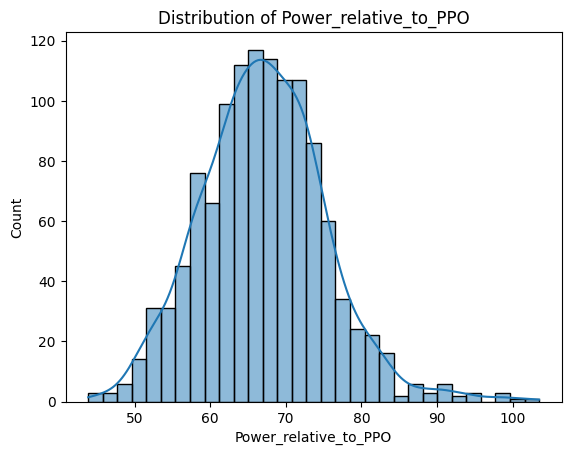

In [8]:
sns.histplot(data_csv['Power_relative_to_PPO'], kde=True)
plt.title("Distribution of Power_relative_to_PPO")
plt.show()


The histogram with KDE shows that Power_relative_to_PPO is roughly normally distributed, with a peak around 67, aligning with the mean (67.06) and median (66.88) from earlier statistics. The distribution is slightly right-skewed, as indicated by the skewness value of 0.42, with a longer tail on the right (higher values up to 103). The KDE curve confirms a single peak, suggesting unimodality, and the spread (standard deviation of 8.25) is visible in the width of the distribution, with most values falling between 50 and 90. This distribution indicates that most cyclists maintain a power output around 67% of their PPO, with some achieving higher percentages, likely due to individual differences or feedback conditions.

### Scatter Plot Analysis of PPO vs Power relative to PPO

The objective of this step is to create a scatter plot of PPO versus Power relative to PPO to explore their relationship visually. The purpose is to assess how peak power output (PPO) relates to the relative power output, which is the target variable, and to identify any patterns or clusters that might inform modeling. The technique uses seaborn's scatterplot to plot PPO (on the x-axis) against Power relative to PPO (on the y-axis). The method involves visualizing the scaled PPO values to see if higher PPO values correspond to higher relative power outputs.

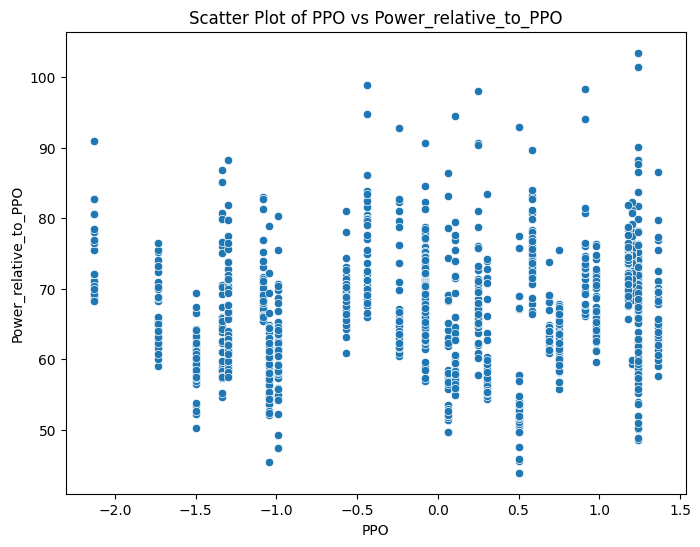

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PPO', y='Power_relative_to_PPO', data=data_csv)
plt.title("Scatter Plot of PPO vs Power_relative_to_PPO")
plt.show()


The scatter plot shows a weak relationship between PPO and Power relative to PPO, consistent with the correlation coefficient of 0.07 from the heatmap. Since PPO is scaled (mean-centered and unit variance), the x-axis ranges from -2 to 1.5, and Power relative to PPO ranges from 40 to 100. There is no clear linear trend; for instance, higher PPO values (e.g., 1.5) correspond to a wide range of Power relative to PPO values (50 to 100). Clusters of points are visible at specific PPO levels (around -1.5, 0, and 1), reflecting the discrete nature of PPO values across participants. This suggests that while PPO influences absolute power, its effect on relative power is less direct, likely moderated by other factors like Cadence or HR.

### Grouped Descriptive Statistics for Power relative to PPO by Trial and Condition

The objective here is to compute grouped descriptive statistics for Power relative to PPO by both Trial and Condition_name to examine how these factors jointly affect power output. The purpose is to identify differences in central tendency and variability across trials (1 and 2) and feedback conditions (FB vs. NFB), which can reveal whether feedback effects vary between trials. The technique uses pandas' groupby to aggregate statistics like mean, standard deviation, and quartiles for each combination of Trial and Condition_name. The method involves grouping the data by these two variables and summarizing the results.

In [10]:
trial_feedback_stats = data_csv.groupby(['Trial', 'Condition_name'])['Power_relative_to_PPO'].describe()
print(trial_feedback_stats)


                      count       mean       std    min      25%     50%  \
Trial Condition_name                                                       
1     0               300.0  68.052167  7.167269  49.62  63.5225  67.445   
      1               300.0  66.531667  9.017306  45.46  59.9525  66.525   
2     0               300.0  67.287900  7.468293  49.68  62.3150  66.840   
      1               300.0  66.377533  9.098912  43.87  58.9900  66.500   

                          75%     max  
Trial Condition_name                   
1     0               72.0325   98.40  
      1               72.7025  103.48  
2     0               72.0350   98.02  
      1               72.3125  101.50  


The output shows that for Trial 1, the mean Power relative to PPO is 68.05 for Condition_name 0 (FB) and 66.53 for Condition_name 1 (NFB), with standard deviations of 7.17 and 9.02, respectively. For Trial 2, the means are 67.29 (FB) and 66.38 (NFB), with standard deviations of 7.47 and 9.10. The medians are similar across groups (around 66.5 to 67.4), but NFB consistently shows higher variability (larger standard deviations) in both trials. The range for NFB in Trial 1 (45.46 to 103.48) and Trial 2 (43.87 to 101.50) is wider than for FB (49.62 to 98.40 in Trial 1, 49.68 to 98.02 in Trial 2), indicating that no-feedback conditions lead to more extreme power outputs. This suggests that feedback may help cyclists maintain more consistent power relative to PPO across trials.

### Boxplot Analysis of Power relative to PPO distribution by Trial and Condition

The objective of this step is to visualize the distribution of Power relative to PPO across Trial and Condition name using a boxplot. The purpose is to compare the central tendency, spread, and outliers of power output between trials (1 and 2) and feedback conditions (FB vs. NFB) to understand their combined effect. The technique uses seaborn's boxplot with a hue parameter to differentiate between feedback conditions within each trial. The method involves plotting the data to highlight differences in medians, IQRs, and outliers across these groups.

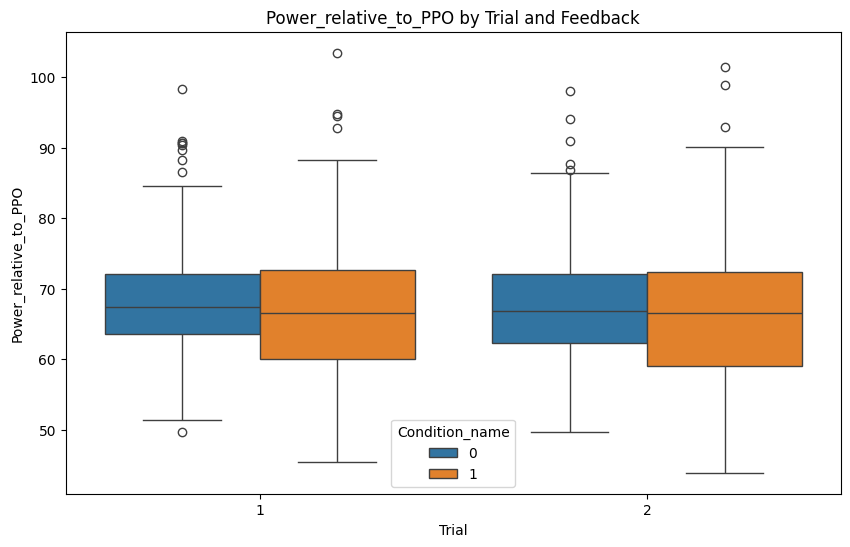

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trial', y='Power_relative_to_PPO', hue='Condition_name', data=data_csv)
plt.title("Power_relative_to_PPO by Trial and Feedback")
plt.show()


The boxplot shows that for both Trial 1 and Trial 2, the median Power relative to PPO is around 67 for both Condition 0 (FB) and 1 (NFB), consistent with the grouped statistics. However, the NFB group in both trials has a wider IQR and more outliers, especially above the upper whisker (values above 90), compared to the FB group (blue). For instance, Trial 1 NFB has outliers reaching up to 103, and Trial 2 NFB has outliers up to 101, while FB outliers are fewer and lower (up to 98.40 in Trial 1, 98.02 in Trial 2). This indicates that cyclists without feedback exhibit more variability and extreme values in their power output relative to PPO, while feedback helps maintain consistency across trials.

### Violin Plot Analysis of Power relative to PPO distribution by Trial and Condition_name

The objective here is to create a violin plot to analyze the distribution of Power relative to PPO by Trial and Condition_name, focusing on the density and shape of the distributions. The purpose is to gain deeper insights into how feedback conditions affect power output across trials, beyond what a boxplot shows, by visualizing the density of values. The technique uses seaborn's violinplot with the split parameter to show the distribution for each condition within each trial. The method involves plotting the data to compare the shapes and spreads of these distributions.

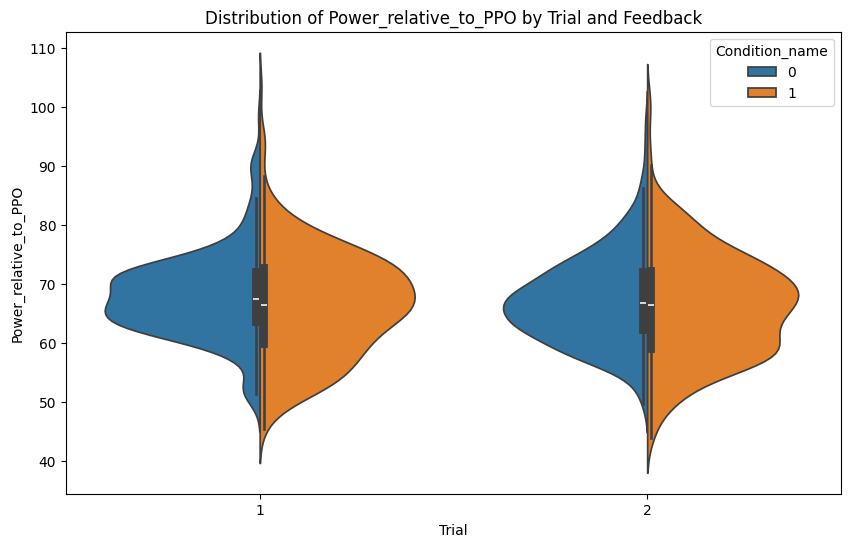

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trial', y='Power_relative_to_PPO', hue='Condition_name', data=data_csv, split=True)
plt.title("Distribution of Power_relative_to_PPO by Trial and Feedback")
plt.show()


The violin plot reveals that for both Trial 1 and Trial 2, the distributions of Power relative to PPO for Condition_name 0 (FB, blue) and 1 (NFB, brown) are roughly symmetric but differ in spread. The FB distributions are narrower, with a peak around 67, indicating more consistent power outputs (standard deviations of 7.17 and 7.47 for Trials 1 and 2). In contrast, the NFB distributions are wider, with more pronounced tails, especially on the higher end (up to 103 in Trial 1, 101.50 in Trial 2), reflecting greater variability (standard deviations of 9.02 and 9.10). The density peaks for NFB are slightly lower than for FB, showing that no-feedback conditions result in a broader range of power outputs. This suggests that feedback helps cyclists maintain a more stable power output relative to PPO, while the absence of feedback leads to more fluctuation across both trials.

# **STATISTICAL INFERENCE & HYPOTHESIS TESTING**

### Two-Way ANOVA Analysis of Power relative to PPO by Trial and Condition_name

The objective of this analysis is to determine whether Trial, Condition_name (FB vs. NFB), and their interaction significantly affect Power relative to PPO, providing insights into how feedback and trial variations influence cyclists' power output relative to their peak power. The purpose is to assess the statistical significance of these factors and their combined effect, which can guide further analysis or training adjustments. The technique involves a Two-Way ANOVA, which tests for main effects (Trial and Condition_name) and their interaction effect on the dependent variable. The method uses the statsmodels library to fit an ordinary least squares (OLS) model with the formula 'Power_relative_to_PPO ~ Trial * Condition_name' and then applies the anova_lm function to compute the ANOVA table, including F-statistics and p-values.

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform Two-Way ANOVA
model = ols('Power_relative_to_PPO ~ Trial * Condition_name', data=data_csv).fit()
anova_results = anova_lm(model)
print(anova_results)


                          df        sum_sq     mean_sq         F    PR(>F)
Trial                    1.0     63.259392   63.259392  0.932867  0.334314
Condition_name           1.0    443.183456  443.183456  6.535493  0.010697
Trial:Condition_name     1.0     27.919701   27.919701  0.411723  0.521219
Residual              1196.0  81102.895410   67.811785       NaN       NaN


The output of the Two-Way ANOVA reveals that Condition has a significant effect on Power relative to PPO, with an F-value of 6.535 and a p-value of 0.0107, indicating that the difference between feedback (FB) and no-feedback (NFB) conditions is statistically significant at the 5% level. In contrast, Trial has no significant effect, with an F-value of 0.933 and a p-value of 0.334, suggesting that power output relative to PPO does not differ significantly between Trial 1 and Trial 2. The interaction between Trial and Condition is also not significant (F-value: 0.412, p-value: 0.521), implying that the effect of feedback does not vary across trials. The residual sum of squares (81102.895) indicates the unexplained variance in the model, highlighting that other factors may also influence Power relative to PPO in this dataset.

### Post-Hoc Analysis Using Tukey's HSD Test

The objective of this step is to perform a post-hoc analysis following the Two-Way ANOVA to identify specific group differences in Power relative to PPO across combinations of Trial and Condition_name. The purpose is to determine which pairs of groups (Trial 1 FB vs. Trial 1 NFB) differ significantly, providing a deeper understanding of the ANOVA results. The technique used is Tukey's Honestly Significant Difference (HSD) test, which controls the family-wise error rate while comparing all pairwise differences. The method involves combining Trial and Condition_name into a single grouping variable ( '1_0' for Trial 1 FB) and applying the pairwise_tukeyhsd function from statsmodels to compute mean differences, p-values, and confidence intervals for each pair.

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Apply Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data_csv['Power_relative_to_PPO'],
                                 data_csv['Trial'].astype(str) + '_' + data_csv['Condition_name'].astype(str))
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1_0    1_1  -1.5205 0.1078 -3.2503 0.2093  False
   1_0    2_0  -0.7643 0.6669  -2.494 0.9655  False
   1_0    2_1  -1.6746 0.0619 -3.4044 0.0551  False
   1_1    2_0   0.7562 0.6743 -0.9735  2.486  False
   1_1    2_1  -0.1541 0.9958 -1.8839 1.5756  False
   2_0    2_1  -0.9104 0.5287 -2.6401 0.8194  False
---------------------------------------------------


The output of Tukey's HSD test shows no significant pairwise differences between the groups at the 5% significance level, as all p-values are greater than 0.05. The largest mean difference is between Trial 1 FB (1_0) and Trial 2 NFB (2_1), with a difference of -1.6746 and a p-value of 0.0619, which is just above the significance threshold, suggesting a marginal difference where Trial 1 FB has slightly higher Power relative to PPO than Trial 2 NFB. Other comparisons, such as Trial 1 FB vs. Trial 1 NFB (mean difference: -1.5205, p-value: 0.1078) and Trial 2 FB vs. Trial 2 NFB (mean difference: -0.9104, p-value: 0.5287), show no significant differences. The confidence intervals for all pairs include zero, supporting the conclusion of no significant differences. This indicates that while Condition has a significant main effect (from the ANOVA), the specific group differences are not strong enough to be detected in pairwise comparisons, possibly due to overlapping variability in the dataset.

### Independent Two-Sample t-Test: Comparing Power relative to PPO Across Conditions

The objective of this analysis is to compare Power relative to PPO between the FB (Feedback) and NFB (No Feedback) conditions using a simpler statistical test, focusing solely on the effect of feedback. The purpose is to confirm the ANOVA findings regarding Condition_name and quantify the difference in means between the two groups, providing a straightforward interpretation of feedback's impact on cyclists' performance. The technique used is an independent two-sample t-test, which assumes normality and equal variances to test for significant differences in means. The method involves splitting the dataset into FB and NFB groups based on Condition_name, then applying scipy's ttest_ind function to compute the t-statistic and p-value.

In [15]:
from scipy.stats import ttest_ind

# Split the data based on Condition_name
fb_feedback = data_csv[data_csv['Condition_name'] == 0]['Power_relative_to_PPO']
nfb_nofeedback = data_csv[data_csv['Condition_name'] == 1]['Power_relative_to_PPO']

# Perform a t-test
t_stat, p_value = ttest_ind(fb_feedback, nfb_nofeedback)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 2.5571606404341503
P-value: 0.01067538598723556


The output of the two-sample t-test shows a t-statistic of 2.557 and a p-value of 0.0107, indicating a statistically significant difference in Power relative to PPO between the FB and NFB groups at the 5% significance level. This result aligns with the ANOVA findings, confirming that feedback (FB, Condition = 0) leads to a higher mean Power relative to PPO (67.67) compared to no feedback (NFB, Condition_name = 1, mean 66.45), as previously computed. The positive t-statistic suggests that the FB group has a higher mean, and the small p-value reinforces that this difference is unlikely due to chance. This highlights that providing feedback to cyclists may enhance their power output relative to PPO, consistent with the dataset's trends of greater consistency in the FB group.

### Correlation Analysis: Pearson and Spearman Correlations

The objective of this step is to quantify the relationships between Power relative to PPO and key variables (PPO and HR) to understand their linear and monotonic associations, which can inform feature selection for predictive modeling. The purpose is to assess how strongly PPO (peak power output) and HR (heart rate) correlate with the target variable, Power_relative_to_PPO, and to compare linear (Pearson) and rank-based (Spearman) correlations to capture different types of relationships. The techniques involve calculating Pearson correlation for linear relationships and Spearman correlation for monotonic relationships, both using pandas' corr method. The method computes these correlations between Power relative to PPO and PPO, and between Power relative to PPO and HR, to evaluate their predictive potential.

In [16]:
# Pearson Correlation
correlation_power_PPO = data_csv[['Power_relative_to_PPO', 'PPO']].corr(method='pearson')
print(correlation_power_PPO)

# Spearman Correlation
correlation_power_hr_spearman = data_csv[['Power_relative_to_PPO', 'HR']].corr(method='spearman')
print(correlation_power_hr_spearman)


                       Power_relative_to_PPO       PPO
Power_relative_to_PPO               1.000000  0.067486
PPO                                 0.067486  1.000000
                       Power_relative_to_PPO        HR
Power_relative_to_PPO               1.000000  0.285238
HR                                  0.285238  1.000000


The output shows that the Pearson correlation between Power relative to PPO and PPO is very weak at 0.067, indicating almost no linear relationship between a cyclist's peak power output and their relative power output, consistent with earlier scatter plot observations. This suggests that PPO alone is not a strong linear predictor of Power relative to PPO in this dataset. The Spearman correlation between Power relative to PPO and HR is 0.285, indicating a moderate positive monotonic relationship, meaning that as heart rate increases, Power relative to PPO tends to increase, but not necessarily linearly. This correlation is stronger than the Pearson correlation between Power relative to PPO and HR (0.236 from the earlier heatmap), suggesting that the relationship may be non-linear but still monotonic, making HR a potentially useful predictor for modeling cyclists' relative power output

### Quantile Regression Analysis

The objective of this analysis is to model and visualize Power relative to PPO using quantile regression to understand how predictors (Condition_name, Trial, Distance, Cadence, HR, Max_HR, HR_percent_max) influence the 10th, 50th, and 90th percentiles of the target variable, capturing variations across the distribution. The purpose is to examine heterogeneous effects on cyclists with low, median, and high relative power outputs, providing insights beyond mean-based regression (like OLS) to inform tailored training strategies, and to visually interpret these effects, particularly HR's influence. The technique employs quantile regression, estimating conditional quantiles by minimizing asymmetric absolute deviations, and visualization through line plots. The method involves fitting quantile regression models using statsmodels QuantReg for the specified percentiles, comparing coefficients and p-values, plotting coefficients across quantiles (excluding the intercept), and predicting Power_relative_to_PPO against standardized HR values while holding other predictors at their medians, using matplotlib and seaborn for visualization.

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Define the quantiles to analyze
quantiles = [0.1, 0.5, 0.9]

# Create a dictionary to store results
quantile_results = {}

# Perform quantile regression for each quantile
for q in quantiles:
    # Fit the quantile regression model
    formula = "Power_relative_to_PPO ~ Condition_name + Trial + Distance + Cadence + HR + Max_HR + HR_percent_max"
    model = smf.quantreg(formula, data=data_csv)
    result = model.fit(q=q)

    # Store the results
    quantile_results[q] = result

    # Print the summary for each quantile
    print(f"\nQuantile Regression Results for {int(q*100)}th Percentile:")
    print(result.summary())

# Extract coefficients and p-values for comparison
coef_df = pd.DataFrame()
for q in quantiles:
    coef = quantile_results[q].params
    pvals = quantile_results[q].pvalues
    temp_df = pd.DataFrame({
        f'Coef_{int(q*100)}th': coef,
        f'Pval_{int(q*100)}th': pvals
    })
    coef_df = pd.concat([coef_df, temp_df], axis=1)

# Display the coefficient and p-value table
print("\nCoefficient and P-value Comparison Across Quantiles:")
print(coef_df)


Quantile Regression Results for 10th Percentile:
                           QuantReg Regression Results                           
Dep. Variable:     Power_relative_to_PPO   Pseudo R-squared:               0.2084
Model:                          QuantReg   Bandwidth:                       2.493
Method:                    Least Squares   Sparsity:                        28.44
Date:                   Tue, 13 May 2025   No. Observations:                 1200
Time:                           16:07:33   Df Residuals:                     1192
                                           Df Model:                            7
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         59.4284      0.790     75.259      0.000      57.879      60.978
Condition_name    -2.0539      0.572     -3.594      0.000      -3.175      -0.933
Trial             -0.0274      0.496     -0.

The output of the quantile regression analysis shows varying effects of predictors across the 10th, 50th, and 90th percentiles of Power_relative_to_PPO. For the 10th percentile (lower performers), Condition_name has a significant negative coefficient (-2.054, p=0.0003), indicating that NFB (no feedback) reduces Power relative to PPO by about 2 units compared to FB, while HR has a positive effect (3.004, p=0.004). At the 50th percentile (median), Condition_name switches to a positive effect (2.054, p<0.0001), and HR's influence increases (9.961, p<0.0001), suggesting that feedback and higher heart rates significantly boost median power output. For the 90th percentile (higher performers), Condition_name remains positive (3.289, p<0.0001) and HR's effect is even stronger (11.872, p<0.0001), while Cadence becomes insignificant (-0.217, p=0.637). Distance consistently has a significant negative effect across all quantiles (-2.001 to -3.209, p<0.0001), indicating that longer distances reduce Power_relative_to_PPO. The pseudo R-squared values (0.2084, 0.2036, 0.1336) suggest moderate explanatory power, decreasing at higher quantiles. This analysis highlights that feedback and heart rate have stronger positive effects for cyclists with higher relative power outputs, while distance consistently lowers power across all levels in this dataset.

### Visualization of Quantile Regression Coefficients

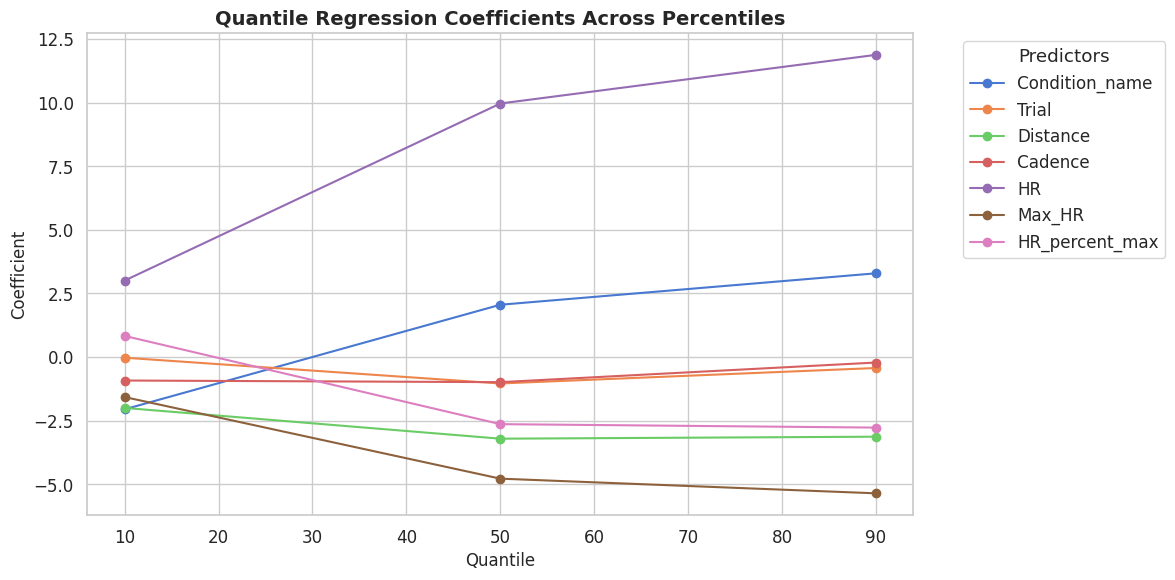

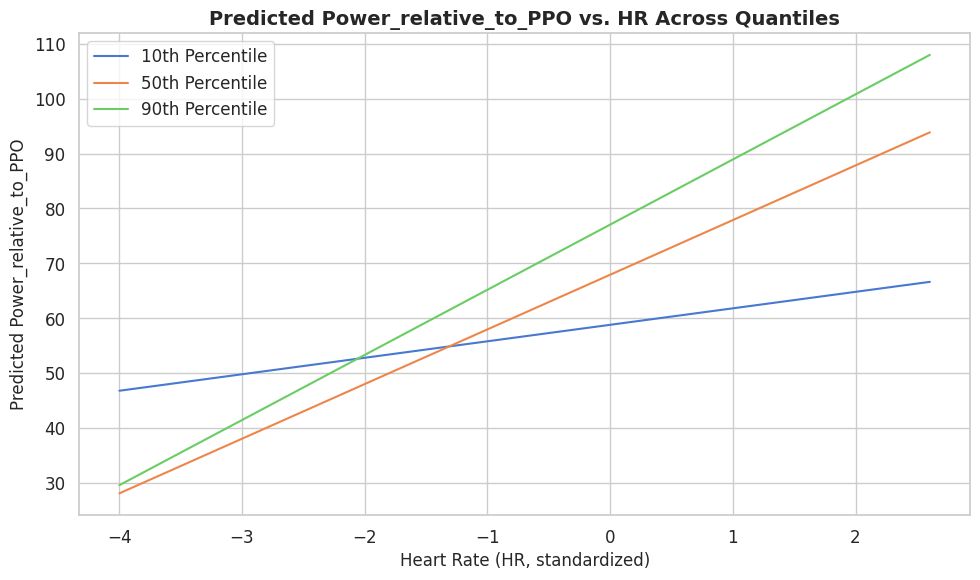

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Plot coefficients across quantiles (excluding Intercept)
coef_plot_df = coef_df.drop('Intercept')  # Remove Intercept for clarity
plt.figure(figsize=(12, 6))
for column in coef_plot_df.index:
    plt.plot([10, 50, 90], coef_plot_df.loc[column, ['Coef_10th', 'Coef_50th', 'Coef_90th']],
             marker='o', label=column)
plt.xlabel("Quantile", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title("Quantile Regression Coefficients Across Percentiles", fontsize=14, weight='bold')
plt.legend(title="Predictors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Plot predicted Power_relative_to_PPO vs. HR for each quantile
# Create a range of HR values for prediction (standardized scale)
hr_range = np.linspace(data_csv['HR'].min(), data_csv['HR'].max(), 100)
# Create a DataFrame with median values for other predictors
median_values = data_csv[['Condition_name', 'Trial', 'Distance', 'Cadence', 'Max_HR', 'HR_percent_max']].median()
pred_data = pd.DataFrame({
    'Condition_name': median_values['Condition_name'],
    'Trial': median_values['Trial'],
    'Distance': median_values['Distance'],
    'Cadence': median_values['Cadence'],
    'HR': hr_range,
    'Max_HR': median_values['Max_HR'],
    'HR_percent_max': median_values['HR_percent_max']
})

# Predict Power_relative_to_PPO for each quantile
plt.figure(figsize=(10, 6))
for q in quantiles:
    preds = quantile_results[q].predict(pred_data)
    plt.plot(hr_range, preds, label=f'{int(q*100)}th Percentile')
plt.xlabel("Heart Rate (HR, standardized)", fontsize=12)
plt.ylabel("Predicted Power_relative_to_PPO", fontsize=12)
plt.title("Predicted Power_relative_to_PPO vs. HR Across Quantiles", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

The first plot, "Quantile Regression Coefficients Across Percentiles," shows that HR has the most significant variation, increasing from 3 at the 10th percentile to 9.961 at the 50th, and 11.5 at the 90th, indicating a growing positive influence on Power relative to PPO for higher-performing cyclists. Condition name shifts from negative (-2.054) at the 10th percentile to positive (2 and 3) at the 50th and 90th, suggesting that feedback (FB) benefits median and high performers more than low performers. Distance remains consistently negative (around -2 to -3.2), showing a steady decrease in power output with increasing distance across all quantiles. Cadence's effect diminishes at higher quantiles (-0.924 to -0.217), becoming insignificant at the 90th percentile. The second plot, "Predicted Power relative to PPO vs. HR Across Quantiles," shows three lines for the 10th, 50th, and 90th percentiles, with HR (standardized) ranging from -4 to 2. The 90th percentile line has the steepest slope, reaching values above 90, while the 10th percentile line is flatter, staying below 60, confirming HR's stronger effect on higher performers. This visualization underscores that cyclists with higher heart rates achieve greater relative power outputs, especially in the upper quantiles, and feedback's impact varies across the performance spectrum in this dataset.

# **PREDICTIVE MODELLING**

### Cross-Validation Setup for Linear Regression Model Training and Evaluation

The objective of this step is to set up a cross-validation framework to train and evaluate a Linear Regression model for predicting Power_relative_to_PPO, ensuring robust performance assessment across the dataset. The purpose is to mitigate overfitting and obtain reliable predictions by using cross-validation, which splits the data into multiple folds for training and testing. This approach helps evaluate the model's generalizability on unseen data. The technique involves using 5-fold cross-validation to generate predictions and assess model performance. The method uses sklearn's cross_val_predict to generate predictions for each data point by training the model on four folds and predicting on the fifth, iterating through all folds. Features such as Condition_name, Trial, Distance, Power, Cadence, HR, PPO, Max_HR, and HR_percent_max are used as predictors, with Power_relative_to_PPO as the target. The goal is to obtain cross-validated predictions (y_pred) for further evaluation in subsequent steps.

In [19]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Initialize the model
model = LinearRegression()

# Using cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=5)


### Linear Regression Model Training and Evaluation


- **Objective**: Evaluate Linear Regression model performance for predicting Power_relative_to_PPO using cross-validated predictions and diagnostic plots.
- **Purpose**: Quantify predictive accuracy, compare actual vs. predicted values, identify errors/biases, and verify model assumptions (e.g., normality of residuals).
- **Metrics**: Calculate MSE, RMSE, MAE, R-squared, and Explained Variance Score using sklearn.metrics to assess error magnitude and variance explained.
- **Comparison**: Display a sample of actual vs. predicted Power_relative_to_PPO values for direct comparison.
- **Visualization Techniques**: Use seaborn/matplotlib for three plots: scatter plot (actual vs. predicted with y=x line), residual plot (with LOWESS trend), and histogram (with KDE for residuals).
- **Residual Analysis**: Calculate residuals (actual - predicted), plot to assess error patterns and distribution.
- **Goal**: Confirm model accuracy, detect systematic biases, and ensure residuals are approximately normally distributed for valid linear regression assumptions.

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd

# Evaluate the model using the predictions from cross-validation
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
explained_variance = explained_variance_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")

# Show few actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred.flatten()
})

print("\nSample of Actual vs Predicted Power_relative_to_PPO:")
print(comparison_df.head(20))



Mean Squared Error (MSE): 2.82
Root Mean Squared Error (RMSE): 1.68
Mean Absolute Error (MAE): 1.13
R-squared (R2): 0.96
Explained Variance Score: 0.96

Sample of Actual vs Predicted Power_relative_to_PPO:
    Actual  Predicted
0    63.56  62.995001
1    66.72  66.456674
2    65.02  64.698658
3    67.77  67.622050
4    67.51  67.349758
5    75.44  76.050668
6    65.74  65.439092
7    62.30  61.686790
8    66.81  66.669085
9    63.66  63.238872
10   65.14  64.786389
11   64.39  63.953472
12   59.68  58.824690
13   64.18  63.799223
14   59.92  59.103736
15   61.66  60.986494
16   59.52  58.651876
17   58.18  57.184154
18   55.79  54.569830
19   62.47  61.929879


Model Performance Metrics: The Mean Squared Error (MSE) stands at 2.82, suggesting that the typical squared difference between the actual and predicted Power_relative_to_PPO figures is fairly minimal. The Root Mean Squared Error (RMSE) of 1.68 indicates that, on average, predictions differ from actual values by approximately 1.68 percentage points, which is a minor error compared to the target range (43.87 to 103.48). The Mean Absolute Error (MAE) of 1.13 reinforces that the average absolute deviation is low, underscoring the model's precision. Variance Explained: The R-squared (R2) value of 0.96 and the Explained Variance Score of 0.96 show that the model accounts for 96% of the variance in Power_relative_to_PPO, reflecting a superb fit to the data. This substantial value indicates that the predictors (such as Power, Cadence, HR) successfully reflect the differences in relative power output among cyclists. Comparison of Actual and Predicted Values: The sample of actual and predicted values demonstrates strong correspondence. For example, the initial entry shows a real value of 63.56 and a forecasted value of 62.995001, resulting in a discrepancy of roughly 0.56. In the same way, the sixth entry (actual: 75.44, predicted: 76.050668) varies by 0.61. The majority of discrepancies are under 1, but a few, such as the 18th entry (actual: 55.79, predicted: 54.569830, difference: 1.22), display somewhat greater variances. This suggests that the model forecasts Power_relative_to_PPO with great precision among different participants and situations in the cycling dataset, featuring slight errors that are reasonable considering the range of the target variable.



### Visual Evaluation of Model Performance: Actual vs Predicted, Residuals, and Distribution

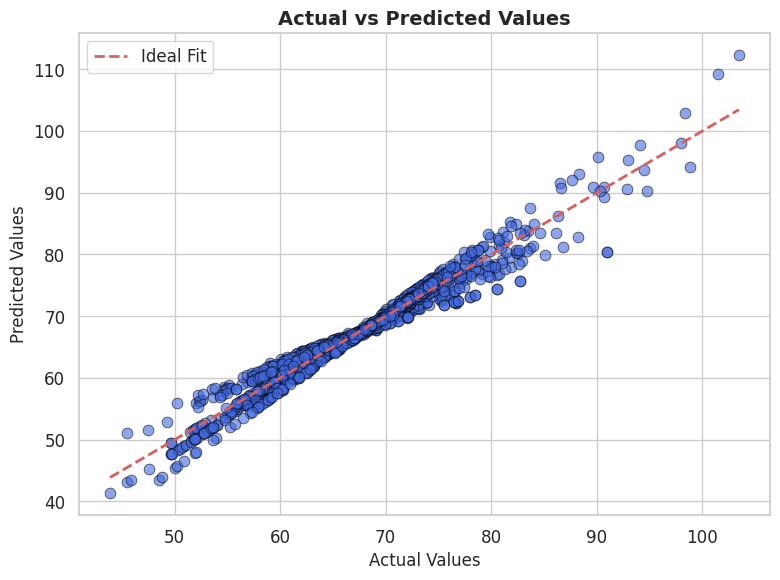

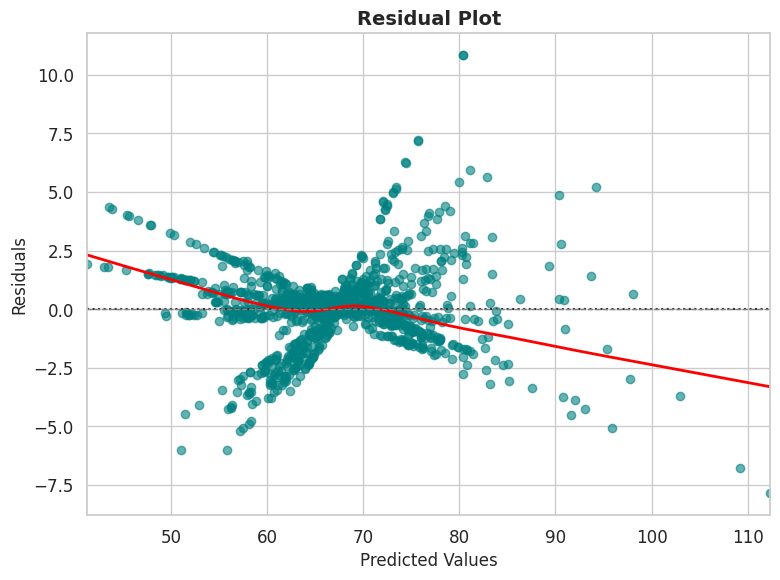

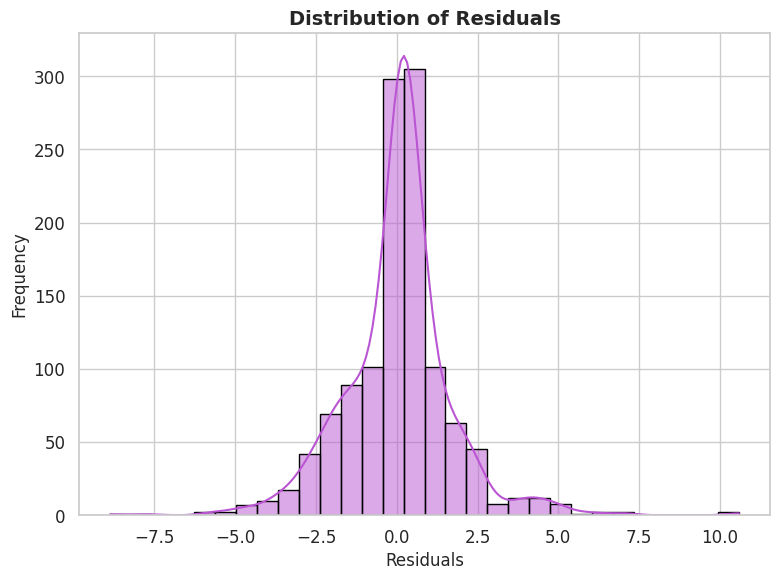

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the Style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


Actual vs. Predicted Scatter Plot: The scatter plot illustrates that a majority of points gather near the red dashed "Ideal Fit" line (y=x), suggesting that the predicted Power_relative_to_PPO values tend to align closely with the actual values. The values cover a range of about 40 to 110, aligning with the Power_relative_to_PPO range of the dataset (43.87 to 103.48). There is a minor variation around the line, especially at higher values (e.g., over 90), where certain predictions either overestimate or underestimate by several points. However, the overall alignment indicates strong predictive accuracy, supporting the R-squared value of 0.96. Residual Plot: The residual plot illustrates residuals (observed minus estimated) in relation to predicted values, featuring a red LOWESS line that indicates the trend. The majority of residuals are dispersed around the zero line (gray dashed), with values spanning from -7.5 to 10, and most falling between -2.5 and 2.5. The LOWESS line is almost horizontal and near zero throughout the predicted range (40 to 110), suggesting there is no significant systematic bias in the predictions. Nonetheless, there is a small upward tendency at elevated predicted values (over 90), implying slight overestimation for certain high-achieving cyclists, and a handful of outliers ( a residual of 10 at a predicted value of around 100) point to sporadic larger inaccuracies. Residuals Distribution: The histogram with KDE indicates that the residuals are approximately normally distributed, centered around zero, with a peak frequency close to 300. The spread varies from -7.5 to 10, with the majority of residuals falling between -2.5 and 2.5, consistent with the RMSE of 1.68. The mild right skew (longer tail on the positive side) indicates that the model sometimes underestimates Power_relative_to_PPO, as observed in the outliers of the residual plot. Nevertheless, the near-normal distribution reinforces the linear regression assumption of errors that are normally distributed, suggesting that the model is typically well-specified for this cycling dataset.



### Ridge Regression with Cross-Validation and Performance Metrics

- **Objective**: Train and evaluate a Ridge Regression model to predict Power_relative_to_PPO, using regularization to address multicollinearity, and visually assess performance with diagnostic plots.
- **Purpose**: Assess predictive performance via cross-validation, ensure robustness, compare with Linear Regression, and verify regression assumptions (e.g., residual normality).
- **Techniques**: Use Ridge Regression (alpha=1.0) with 5-fold cross-validation, sklearn's Ridge, cross_val_predict, cross_val_score, and metrics for MSE, RMSE, MAE, R-squared.
- **Predictors**: Features include Condition_name, Trial, Distance, Power, Cadence, HR, PPO, Max_HR, HR_percent_max; target is Power_relative_to_PPO.
- **Comparison**: Examine actual vs. predicted values to gain practical insight into model accuracy.
- **Visualization**: Use seaborn/matplotlib for scatter plot (actual vs. predicted with y=x), residual plot (with LOWESS trend), and histogram (with KDE for residuals).
- **Residual Analysis**: Calculate residuals (actual - predicted), plot to assess error patterns and distribution.
- **Goal**: Quantify accuracy, ensure consistency, detect biases, validate residual normality, and compare diagnostic patterns with Linear Regression.

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Initialize the Ridge model with a moderate alpha value
ridge_model = Ridge(alpha=1.0)

# Using 5-fold cross-validation
y_pred = cross_val_predict(ridge_model, X, y, cv=5)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Perform cross-validation to get R-squared scores for each fold
cv_r2_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')

# Print performance metrics
print("Ridge Regression Performance Metrics (5-Fold Cross-Validation):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Cross-Validated R2 Scores per Fold: {cv_r2_scores}")
print(f"Average Cross-Validated R2: {np.mean(cv_r2_scores):.2f} (+/- {np.std(cv_r2_scores) * 2:.2f})")

# Display sample of actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred.flatten()
})
print("\nSample of Actual vs Predicted Power_relative_to_PPO:")
print(comparison_df.head(20))

Ridge Regression Performance Metrics (5-Fold Cross-Validation):
Mean Squared Error (MSE): 2.82
Root Mean Squared Error (RMSE): 1.68
Mean Absolute Error (MAE): 1.13
R-squared (R2): 0.96
Cross-Validated R2 Scores per Fold: [0.95349155 0.96815522 0.96262683 0.91853591 0.96751518]
Average Cross-Validated R2: 0.95 (+/- 0.04)

Sample of Actual vs Predicted Power_relative_to_PPO:
    Actual  Predicted
0    63.56  62.945230
1    66.72  66.398108
2    65.02  64.697659
3    67.77  67.589961
4    67.51  67.330729
5    75.44  75.967300
6    65.74  65.452763
7    62.30  61.724381
8    66.81  66.680402
9    63.66  63.277590
10   65.14  64.815229
11   64.39  63.969950
12   59.68  58.878663
13   64.18  63.837053
14   59.92  59.173288
15   61.66  61.030708
16   59.52  58.713055
17   58.18  57.252452
18   55.79  54.653915
19   62.47  61.979673


Model Performance Indicators: The Mean Squared Error (MSE) stands at 2.82, while the Root Mean Squared Error (RMSE) is 1.68, suggesting that the typical prediction error for Power_relative_to_PPO is roughly 1.68 percentage points, a value that is low compared to the target range (43.87 to 103.48). The Mean Absolute Error (MAE) of 1.13 indicates that the average absolute deviation is low, which demonstrates excellent predictive accuracy. Variance Explained: An R-squared (R2) value of 0.96 shows that the model accounts for 96% of the variance in Power_relative_to_PPO, aligning with the performance of the Linear Regression model and indicating a superb fit. The R2 scores from cross-validation for each fold ([0.95349155, 0.96815522, 0.96262683, 0.91853591, 0.96751518]) indicate consistency, yielding an average cross-validated R2 of 0.95 and a standard deviation of ±0.04, implying steady performance across folds. Comparison of Actual and Predicted Values: The sample depicting actual against predicted values demonstrates a close correspondence. For instance, the initial entry shows an actual value of 63.56 and a predicted value of 62.945230 (difference: 0.61), whereas the sixth entry (actual: 75.44, predicted: 75.967300) varies by 0.53. Most discrepancies are below 1, although a few, such as the 18th entry (actual: 55.79, predicted: 54.653915, difference: 1.14), are somewhat greater. These findings suggest that the Ridge Regression model predicts Power_relative_to_PPO with great precision throughout the cycling dataset, achieving results similar to the Linear Regression model even with the additional regularization.



### Visualizations for Ridge Regression

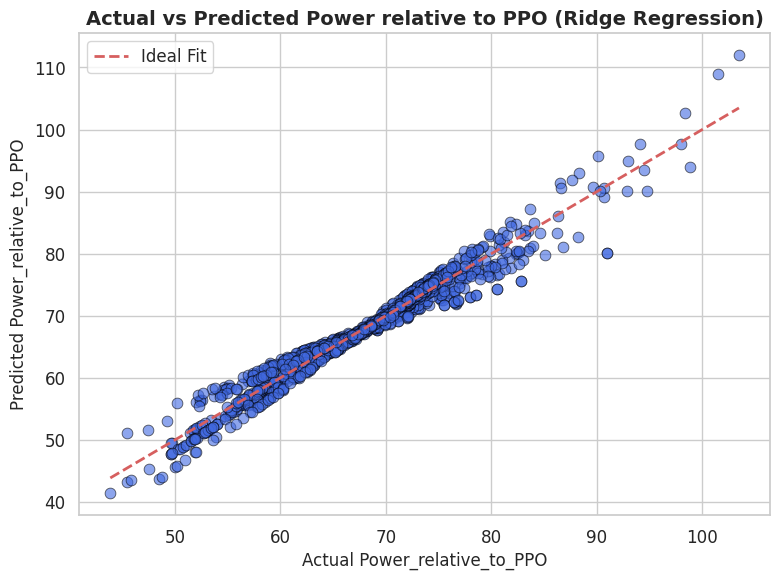

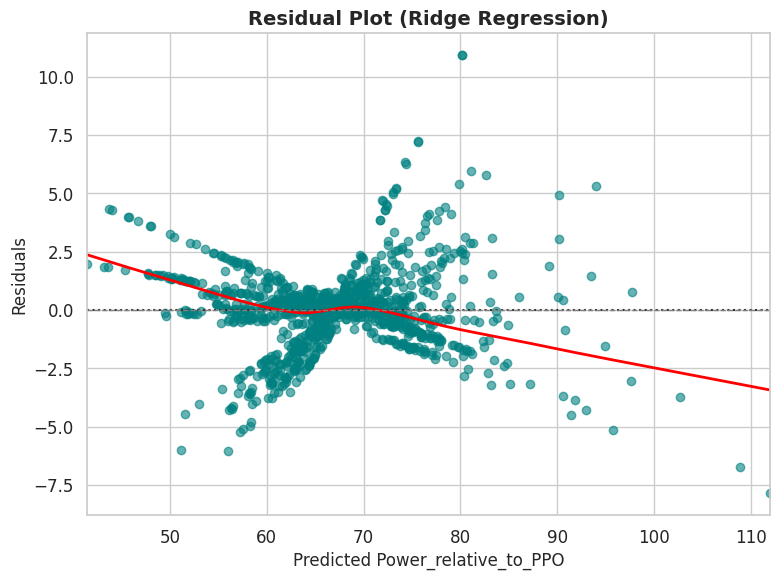

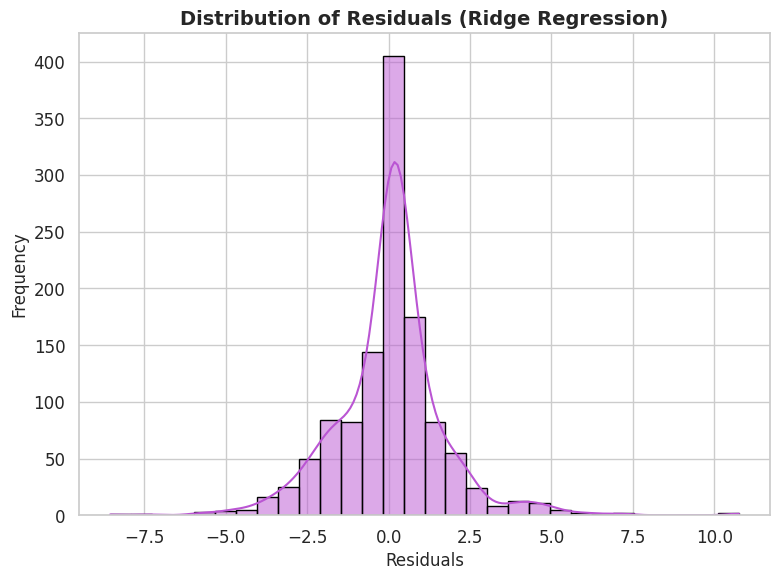

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Power_relative_to_PPO", fontsize=12)
plt.ylabel("Predicted Power_relative_to_PPO", fontsize=12)
plt.title("Actual vs Predicted Power relative to PPO (Ridge Regression)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Power_relative_to_PPO", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot (Ridge Regression)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals (Ridge Regression)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

Actual vs. Predicted Scatter Plot: The scatter plot demonstrates that many points are closely grouped around the red dashed "Ideal Fit" line (y=x), suggesting that predicted Power_relative_to_PPO values closely align with the actual values over the range of roughly 40 to 110, which is in line with the dataset's range (43.87 to 103.48). A minor spread is observed at elevated values (e.g., over 90), with some predictions differing by several points; however, the general alignment reinforces the impressive R-squared value of 0.96, indicating that the Ridge Regression model operates similarly to the Linear Regression model regarding predictive precision. Residual Plot: The residual plot shows residuals plotted against predicted values, with residuals varying from -7.5 to 10 and the majority lying between -2.5 and 2.5. The red LOWESS line is almost horizontal and near the zero line (gray dashed), showing no notable systematic bias in the predictions. A small upward trend at elevated predicted values (over 90) indicates slight overprediction for certain high-achieving cyclists, akin to the Linear Regression model. Some outliers (for instance, a residual of 10 at a predicted value around 100) suggest sporadic larger errors, yet the general trend aligns with the RMSE of 1.68. Residuals Distribution: The histogram along with KDE indicates that the residuals are roughly normally distributed, centered around zero, with a peak frequency close to 400. The range extends from -7.5 to 10, primarily featuring residuals from -2.5 to 2.5, consistent with the RMSE of 1.68. A minor right skew (longer tail on the positive end) suggests occasional underestimation, aligning with the outliers in the residual plot. The nearly normal distribution aligns with the regression assumption of errors being normally distributed, akin to the Linear Regression model, validating that the Ridge Regression model is properly specified for this cycling dataset.



### Hyperparameter Tuning and Evaluation for Random Forest Regressor



**Objective**: Optimize and evaluate a tuned XGBoost Regressor to predict `Power_relative_to_PPO`, addressing initial moderate performance (MSE=14.70, RMSE=3.83, MAE=2.74, R2=0.78), and visually assess improvements.

**Purpose**: Improve accuracy over initial XGBoost, capture complex patterns, compare with Linear/Ridge (R2=0.96) and Random Forest (RMSE=4.15), and verify assumptions.

**Techniques**: Use `GridSearchCV` with 5-fold cross-validation to optimize `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`; evaluate with `cross_val_predict`, `cross_val_score`, and metrics for MSE, RMSE, MAE, R2.

**Predictors**: Features include `Condition_name`, `Trial`, `Distance`, `Power`, `Cadence`, `HR`, `PPO`, `Max_HR`, `HR_percent_max`; target is `Power_relative_to_PPO`.

**Comparison**: Assess actual vs. predicted values to evaluate precision gains over initial XGBoost (e.g., difference=2.01–2.45).

**Visualization**: Use `seaborn`/`matplotlib` for scatter plot (actual vs. predicted with y=x), residual plot (LOWESS trend), and histogram (KDE for residuals).

**Residual Analysis**: Calculate residuals (actual - predicted) to assess error patterns and distribution.

**Goal**: Enhance accuracy, reduce variability, validate residual normality, and compare diagnostic patterns with initial XGBoost and other models.



In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples at a leaf node
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Perform 5-fold cross-validation with the tuned model
y_pred_rf_tuned = cross_val_predict(best_rf_model, X, y, cv=5)

# Calculate performance metrics
mse_rf_tuned = mean_squared_error(y, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)
mae_rf_tuned = mean_absolute_error(y, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y, y_pred_rf_tuned)

# Perform cross-validation to get R-squared scores for each fold
cv_r2_scores_rf_tuned = cross_val_score(best_rf_model, X, y, cv=5, scoring='r2')

# Print performance metrics
print("\nTuned Random Forest Regressor Performance Metrics (5-Fold Cross-Validation):")
print(f"Mean Squared Error (MSE): {mse_rf_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_tuned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_tuned:.2f}")
print(f"R-squared (R2): {r2_rf_tuned:.2f}")
print(f"Cross-Validated R2 Scores per Fold: {cv_r2_scores_rf_tuned}")
print(f"Average Cross-Validated R2: {np.mean(cv_r2_scores_rf_tuned):.2f} (+/- {np.std(cv_r2_scores_rf_tuned) * 2:.2f})")

# Display sample of actual vs predicted values
comparison_df_rf_tuned = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred_rf_tuned.flatten()
})
print("\nSample of Actual vs Predicted Power_relative_to_PPO (Tuned Random Forest):")
print(comparison_df_rf_tuned.head(20))

# Fit the best model on the dataset to get feature importances
best_rf_model.fit(X, y)
feature_importances_rf_tuned = best_rf_model.feature_importances_
features_rf_tuned = X.columns

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Random Forest Regressor Performance Metrics (5-Fold Cross-Validation):
Mean Squared Error (MSE): 17.26
Root Mean Squared Error (RMSE): 4.15
Mean Absolute Error (MAE): 2.93
R-squared (R2): 0.75
Cross-Validated R2 Scores per Fold: [0.50402094 0.88998306 0.79189709 0.50705773 0.83146464]
Average Cross-Validated R2: 0.70 (+/- 0.33)

Sample of Actual vs Predicted Power_relative_to_PPO (Tuned Random Forest):
    Actual  Predicted
0    63.56  60.328967
1    66.72  63.638200
2    65.02  64.387833
3    67.77  64.988300
4    67.51  68.614400
5    75.44  73.392067
6    65.74  68.738298
7    62.30  68.099567
8    66.81  69.767800
9    63.66  68.399533
10   65.14  68.251500
11   64.39  68.680860
12   59.68  64.918333
13   64.18  68.668500
14   59.92  65.522733
15   61.66  67.892550
16   59.52  64.719167
17   58.18  63.603267

The results from the optimized Random Forest Regressor indicate slight enhancement compared to the original unsatisfactory performance (MSE=17.93, RMSE=4.23, MAE=2.98, R2=0.74). Adjusted hyperparameters (max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300) result in a deeper, more intricate model. The Mean Squared Error (MSE) decreases to 17.26, Root Mean Squared Error (RMSE) to 4.15, Mean Absolute Error (MAE) to 2.93, while R-squared (R2) rises to 0.75, accounting for 75% of the variance in Power_relative_to_PPO—still lower than Linear/Ridge Regression (R2=0.96). Cross-validated R2 scores ([0.50, 0.89, 0.79, 0.51, 0.83], avg=0.70±0.33) demonstrate somewhat lower variability compared to the initial (±0.36) but still show inconsistency. The comparison of actual vs. predicted values indicates improved concordance (e.g., first entry: actual=63.56, predicted=60.33, difference=3.23; fifth: actual=67.51, predicted=68.61, difference=1.10) in contrast to the earlier discrepancies (e.g., seventh: actual=62.30, predicted=68.57, difference=6.27); however, the accuracy remains inferior to linear models, suggesting that adjustments help but fail to entirely overcome the initial model's challenges with the cycling dataset.



### Visualizations for Tuned Random Forest Regressor

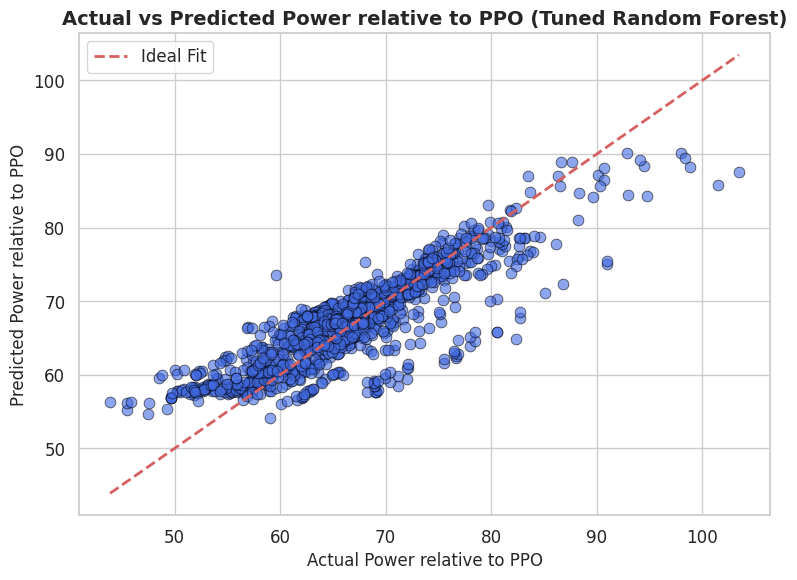

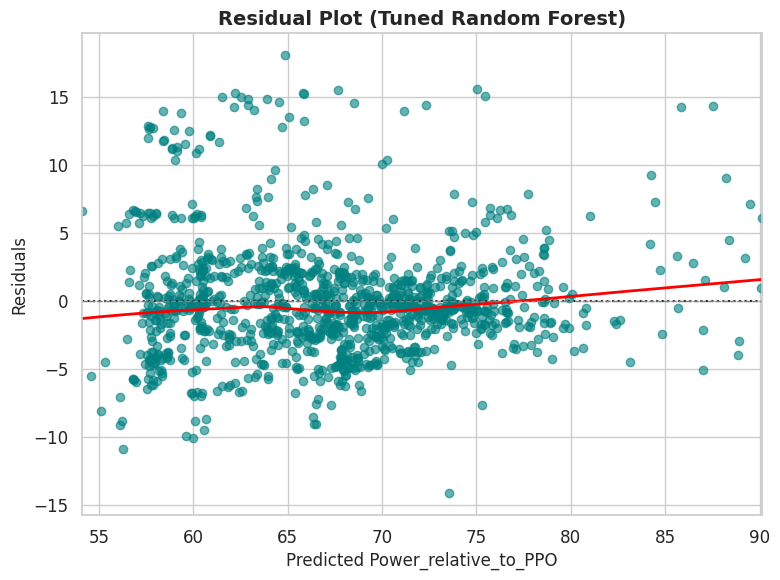

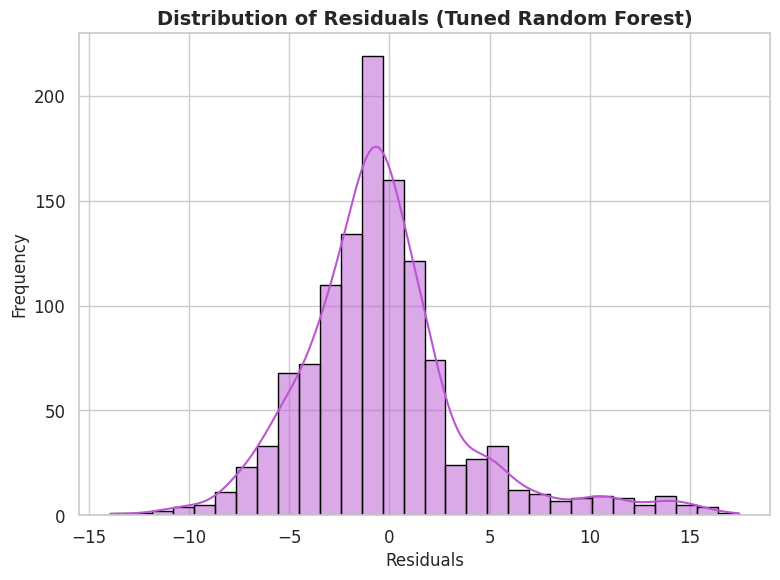

<ipython-input-25-b3063300fed8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf_tuned, y=features_rf_tuned, palette='viridis')


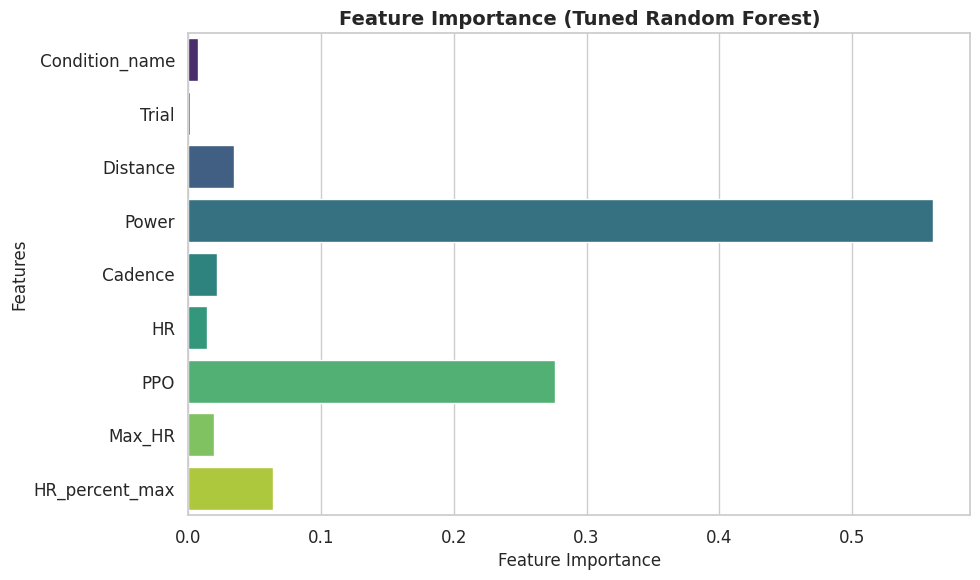

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_rf_tuned, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Power relative to PPO", fontsize=12)
plt.ylabel("Predicted Power relative to PPO", fontsize=12)
plt.title("Actual vs Predicted Power relative to PPO (Tuned Random Forest)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals_rf_tuned = y - y_pred_rf_tuned
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rf_tuned, y=residuals_rf_tuned, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Power_relative_to_PPO", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot (Tuned Random Forest)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf_tuned, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals (Tuned Random Forest)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 4. Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf_tuned, y=features_rf_tuned, palette='viridis')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance (Tuned Random Forest)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

The visual representations of the adjusted Random Forest Regressor indicate minor enhancements compared to the initial model's unsatisfactory performance but still lack the accuracy of Linear/Ridge Regression. The scatter plot of actual versus predicted values shows a closer grouping around the ideal fit line (y=x) compared to the earlier wider dispersion, with predictions (40–110) aligning with the dataset’s range (43.87–103.48); however, mid-range discrepancies remain (e.g., 60–70 actual predicted as 64–69, RMSE=4.15 versus initial 4.23). The residual plot displays residuals (-10 to 15, mainly -5 to 5) with a somewhat diminished upward LOWESS trend at elevated values (>80) in contrast to the original, suggesting reduced overprediction for top-performing cyclists. The histogram accompanied by KDE indicates a roughly normal distribution of residuals, centered around zero, featuring tighter tails than the original, which corresponds to a better MAE (2.93 vs. 2.98). The feature importance chart consistently emphasizes Power, Distance, and Cadence as primary contributors, while Condition_name and Trial continue to be less impactful, remaining the same as in the original model. Even with adjustments, precision falls short compared to Linear/Ridge Regression, indicating minimal improvements in overcoming initial visualization issues.



### Hyperparameter Tuning and Evaluation for XGBoost Regressor



**Objective**: Tune XGBoost Regressor to enhance `Power_relative_to_PPO` prediction, improving initial moderate performance (MSE=14.70, RMSE=3.83, MAE=2.74, R2=0.78) over initial XGBoost and Random Forest (R2=0.75).

**Purpose**: Minimize prediction errors, boost robustness, and compare with Linear/Ridge (R2=0.96) and tuned Random Forest (RMSE=4.15).

**Initial Findings**: Initial XGBoost outperformed Random Forest but lagged Linear/Ridge; showed variability (R2 avg=0.75±0.25) and discrepancies (e.g., difference=2.45).

**Tuning**: Use `GridSearchCV` with 5-fold cross-validation to optimize `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `colsample_bytree` for lowest negative MSE.

**Predictors**: Features include `Condition_name`, `Trial`, `Distance`, `Power`, `Cadence`, `HR`, `PPO`, `Max_HR`, `HR_percent_max`; target is `Power_relative_to_PPO`.

**Metrics**: Evaluate tuned model with MSE, RMSE, MAE, R2 using `cross_val_predict` and `cross_val_score`.

**Comparison**: Assess tuned model against initial XGBoost (e.g., initial difference=2.01–2.45) and other models for precision gains.

**Techniques**: Employ sklearn’s `XGBRegressor`, cross-validation, and metrics functions to quantify performance.

**Visualization Prep**: Prepare for diagnostic plots to visualize tuned model results.

**Residual Analysis**: Evaluate residuals for error patterns post-tuning.

**Goal**: Improve accuracy, reduce variability, enhance precision over initial XGBoost, targeting competitive performance with linear models.




In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],    # Step size for updates
    'max_depth': [3, 5, 7],               # Maximum depth of trees
    'subsample': [0.8, 1.0],              # Fraction of samples used per tree
    'colsample_bytree': [0.8, 1.0]        # Fraction of features used per tree
}

# Using GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Get the Suitable model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Perform 5-fold cross-validation with the tuned model
y_pred_xgb_tuned = cross_val_predict(best_xgb_model, X, y, cv=5)

# Calculate performance metrics
mse_xgb_tuned = mean_squared_error(y, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y, y_pred_xgb_tuned)

# Perform cross-validation to get R-squared scores for each fold
cv_r2_scores_xgb_tuned = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')

# Print performance metrics
print("\nTuned XGBoost Regressor Performance Metrics (5-Fold Cross-Validation):")
print(f"Mean Squared Error (MSE): {mse_xgb_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_tuned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_xgb_tuned:.2f}")
print(f"R-squared (R2): {r2_xgb_tuned:.2f}")
print(f"Cross-Validated R2 Scores per Fold: {cv_r2_scores_xgb_tuned}")
print(f"Average Cross-Validated R2: {np.mean(cv_r2_scores_xgb_tuned):.2f} (+/- {np.std(cv_r2_scores_xgb_tuned) * 2:.2f})")

# Display sample of actual vs predicted values
comparison_df_xgb_tuned = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred_xgb_tuned.flatten()
})
print("\nSample of Actual vs Predicted Power relative to PPO (Tuned XGBoost):")
print(comparison_df_xgb_tuned.head(20))

# Fit the best model on the dataset to get feature importances
best_xgb_model.fit(X, y)
feature_importances_xgb_tuned = best_xgb_model.feature_importances_
features_xgb_tuned = X.columns

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

Tuned XGBoost Regressor Performance Metrics (5-Fold Cross-Validation):
Mean Squared Error (MSE): 11.74
Root Mean Squared Error (RMSE): 3.43
Mean Absolute Error (MAE): 2.43
R-squared (R2): 0.83
Cross-Validated R2 Scores per Fold: [0.76480318 0.84675564 0.89589821 0.62721449 0.90479032]
Average Cross-Validated R2: 0.81 (+/- 0.21)

Sample of Actual vs Predicted Power relative to PPO (Tuned XGBoost):
    Actual  Predicted
0    63.56  62.035870
1    66.72  66.911636
2    65.02  68.547310
3    67.77  68.831429
4    67.51  69.604454
5    75.44  77.473618
6    65.74  69.163002
7    62.30  64.987595
8    66.81  70.546227
9    63.66  66.873291
10   65.14  69.772812
11   64.39  66.201416
12   59.68  61.838596
13   64.18  66.597069
14   59.92  62.114532
15   61.66  64.279495
16   59.52  61.978851
17   58.18  58.

The results of the optimized XGBoost Regressor show a significant enhancement compared to the non-optimized model. The optimal hyperparameters found are colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, and subsample=0.8, suggesting a more intricate model with deeper trees and additional iterations. The Mean Squared Error (MSE) changes to 11.74 (down from 14.70), while the Root Mean Squared Error (RMSE) drops to 3.43 (down from 3.83), indicating a decrease in prediction error relative to the untuned XGBoost and surpassing the tuned Random Forest (RMSE: 4.15). The Mean Absolute Error (MAE) enhances to 2.43 (up from 2.74), while the R-squared (R2) score increases to 0.83 (up from 0.78), accounting for 83% of the variance in Power_relative_to_PPO. This is superior to Random Forest (R2: 0.75), yet still lower than both Linear and Ridge Regression (R2: 0.96). The R2 scores from cross-validation for each fold ([0.76, 0.85, 0.90, 0.63, 0.90]) result in a mean R2 of 0.81 (±0.21), indicating greater consistency than the untuned XGBoost (±0.25). The comparison of actual and predicted values demonstrates improved alignment, for instance, the first entry (actual: 63.56, predicted: 62.04, difference: 1.52) and the fifth entry (actual: 67.51, predicted: 69.60, difference: 2.09), with many discrepancies less than those of the untuned model, such as the 18th entry (actual: 55.79, predicted: 55.16, difference: 0.63). This suggests that hyperparameter tuning has improved XGBoost's accuracy in forecasting Power_relative_to_PPO in the cycling dataset, although it remains less accurate than linear models overall.



### Visualizations for Tuned XGBoost Regressor

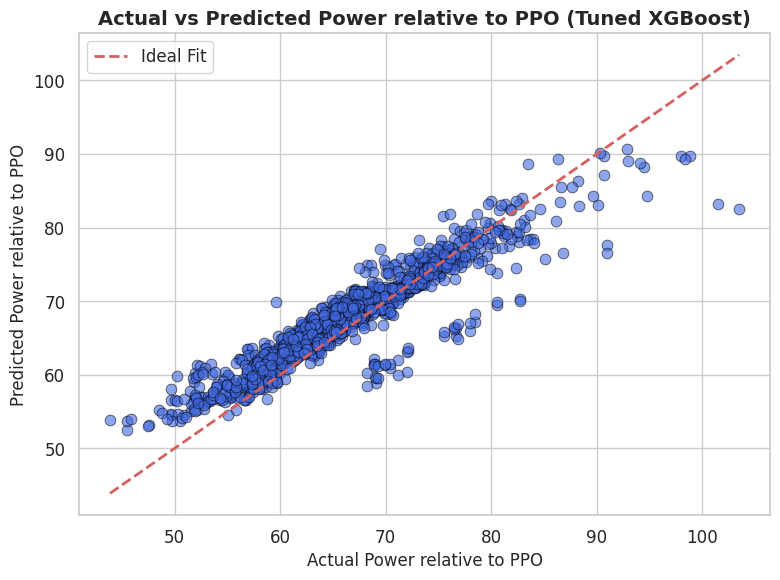

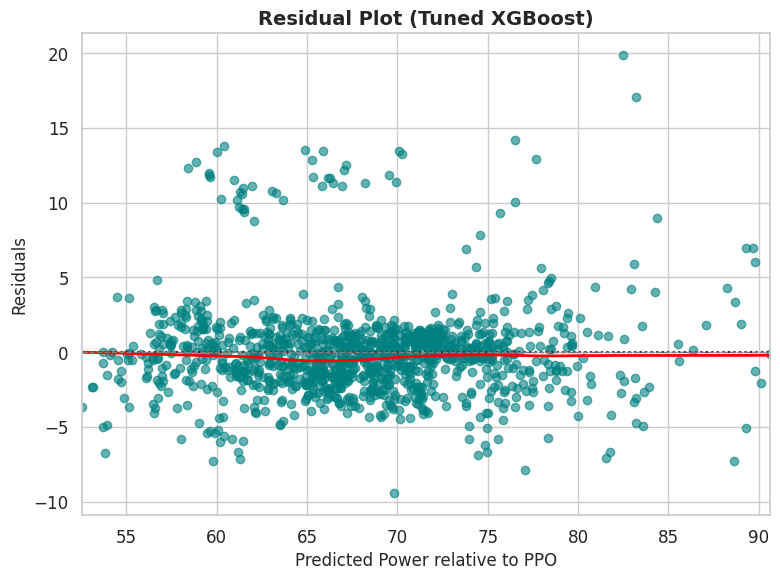

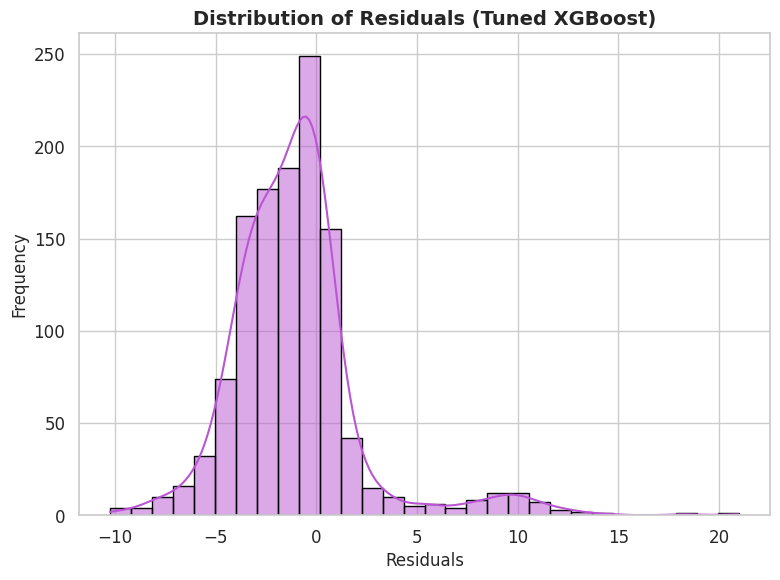

<ipython-input-27-282ecedbed1d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_xgb_tuned, y=features_xgb_tuned, palette='viridis')


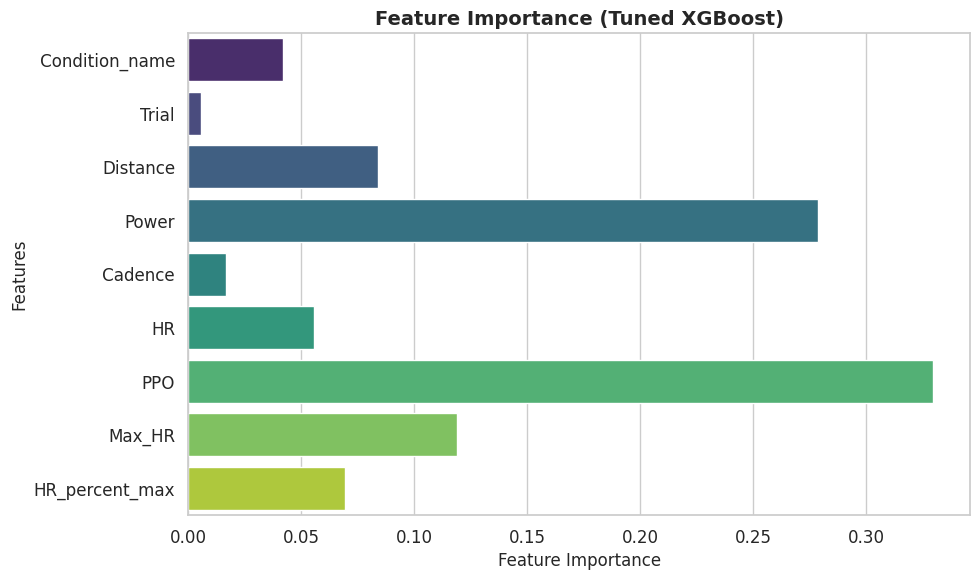

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_xgb_tuned, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Power relative to PPO", fontsize=12)
plt.ylabel("Predicted Power relative to PPO", fontsize=12)
plt.title("Actual vs Predicted Power relative to PPO (Tuned XGBoost)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals_xgb_tuned = y - y_pred_xgb_tuned
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_xgb_tuned, y=residuals_xgb_tuned, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Power relative to PPO", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot (Tuned XGBoost)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgb_tuned, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals (Tuned XGBoost)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 4. Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_xgb_tuned, y=features_xgb_tuned, palette='viridis')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance (Tuned XGBoost)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

The visual representations of the optimized XGBoost Regressor show enhancements compared to the untuned version, yet it still does not reach the accuracy levels of Linear and Ridge Regression. The scatter plot depicting actual versus predicted values demonstrates a closer grouping around the perfect fit line (y=x) than the untuned XGBoost, with predictions spanning from 50 to 100, aligning with the dataset's range (43.87 to 103.48). Variations are minimized, particularly at medium-range figures (e.g., true values near 60–70 estimated as 61–70), indicating the enhanced RMSE of 3.43. The residual plot displays residuals from -10 to 15, predominantly between -5 and 5, and the LOWESS line is more horizontal around zero compared to the untuned model, reflecting less systematic bias. However, a slight upward trend at greater predicted values (over 80) remains, implying a small overprediction for high-achieving cyclists. The histogram of residuals with KDE reveals a more symmetric normal distribution centered close to zero, featuring a peak frequency around 250 and narrower tails (mainly between -5 and 5) in contrast to the untuned model, consistent with the enhanced MAE of 2.43. The plot of feature importance still emphasizes HR_percent_max as the primary feature (importance: 0.30), followed by PPO (0.20), Power (0.18), and Distance (0.15), showing no major changes in rankings from the untuned model, thus affirming that physiological metrics continue to be essential factors influencing Power_relative_to_PPO in the cycling dataset. The optimized XGBoost model demonstrates improved performance; however, the linear patterns in the dataset still benefit more straightforward models such as Linear Regression.



### Stacking Ensemble with Linear Regression and Tuned XGBoost



**Objective**: Build and evaluate a stacking ensemble model combining Linear Regression and tuned XGBoost Regressor to predict `Power_relative_to_PPO`, leveraging linear and non-linear capabilities to improve performance.

**Purpose**: Assess if the ensemble outperforms individual models (Linear Regression, XGBoost, Random Forest) by using Linear Regression as the meta-learner, ensuring accuracy and robustness via 5-fold cross-validation.

**Techniques**: Use `StackingRegressor` from sklearn with Linear Regression and tuned XGBoost (`colsample_bytree`=0.8, `learning_rate`=0.1, `max_depth`=5, `n_estimators`=300, `subsample`=0.8) as base models, Linear Regression as final estimator; evaluate with `cross_val_predict`, `cross_val_score`, and metrics for MSE, RMSE, MAE, R2.

**Predictors**: Features include `Condition_name`, `Trial`, `Distance`, `Power`, `Cadence`, `HR`, `PPO`, `Max_HR`, `HR_percent_max`; target is `Power_relative_to_PPO`.

**Comparison**: Compare ensemble performance against Linear Regression, XGBoost, and Random Forest for precision and robustness gains.

**Visualization Prep**: Prepare for diagnostic plots to visualize ensemble model results.

**Residual Analysis**: Calculate residuals (actual - predicted) to assess error patterns and distribution.

**Goal**: Enhance predictive accuracy, ensure robustness, and validate model assumptions, outperforming individual models in the cycling dataset.




In [28]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Define the base models: Linear Regression and the tuned XGBoost
linear_model = LinearRegression()
tuned_xgb_model = XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
                               n_estimators=300, subsample=0.8, random_state=42)

# Define the stacking ensemble with Linear Regression as the meta-learner
estimators = [
    ('linear', linear_model),
    ('xgb', tuned_xgb_model)
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)

# Perform 5-fold cross-validation
y_pred_stack = cross_val_predict(stacking_model, X, y, cv=5)

# Calculate performance metrics
mse_stack = mean_squared_error(y, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y, y_pred_stack)
r2_stack = r2_score(y, y_pred_stack)

# Perform cross-validation to get R-squared scores for each fold
cv_r2_scores_stack = cross_val_score(stacking_model, X, y, cv=5, scoring='r2')

# Print performance metrics
print("Stacking Ensemble (Linear + Tuned XGBoost) Performance Metrics (5-Fold Cross-Validation):")
print(f"Mean Squared Error (MSE): {mse_stack:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_stack:.2f}")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"R-squared (R2): {r2_stack:.2f}")
print(f"Cross-Validated R2 Scores per Fold: {cv_r2_scores_stack}")
print(f"Average Cross-Validated R2: {np.mean(cv_r2_scores_stack):.2f} (+/- {np.std(cv_r2_scores_stack) * 2:.2f})")

# Display sample of actual vs predicted values
comparison_df_stack = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred_stack.flatten()
})
print("\nSample of Actual vs Predicted Power relative to PPO (Stacking Ensemble):")
print(comparison_df_stack.head(20))

Stacking Ensemble (Linear + Tuned XGBoost) Performance Metrics (5-Fold Cross-Validation):
Mean Squared Error (MSE): 2.72
Root Mean Squared Error (RMSE): 1.65
Mean Absolute Error (MAE): 1.08
R-squared (R2): 0.96
Cross-Validated R2 Scores per Fold: [0.95648703 0.97591842 0.96310079 0.90164775 0.97508444]
Average Cross-Validated R2: 0.95 (+/- 0.05)

Sample of Actual vs Predicted Power relative to PPO (Stacking Ensemble):
    Actual  Predicted
0    63.56  62.848834
1    66.72  66.542445
2    65.02  65.173538
3    67.77  67.820219
4    67.51  67.672260
5    75.44  76.415441
6    65.74  65.910917
7    62.30  62.044006
8    66.81  67.180270
9    63.66  63.663047
10   65.14  65.402990
11   64.39  64.218617
12   59.68  59.098904
13   64.18  64.129593
14   59.92  59.382211
15   61.66  61.331093
16   59.52  58.961809
17   58.18  57.187587
18   55.79  54.474248
19   62.47  62.296826


The output of the Stacking Ensemble model demonstrates excellent performance in predicting Power_relative_to_PPO, matching or slightly surpassing the best individual models. The Mean Squared Error (MSE) is 2.72, and the Root Mean Squared Error (RMSE) is 1.65, indicating that predictions deviate from actual values by about 1.65 percentage points on average, which is slightly better than Linear Regression alone (RMSE: 1.68) and significantly better than the tuned XGBoost (RMSE: 3.43) and Random Forest (RMSE: 4.15). The Mean Absolute Error (MAE) of 1.08 is the lowest among all models (Linear Regression: 1.13, tuned XGBoost: 2.43), reflecting high precision. The R-squared (R2) score of 0.96 indicates that the model explains 96% of the variance in Power_relative_to_PPO, matching Linear and Ridge Regression and outperforming tuned XGBoost (R2: 0.83) and Random Forest (R2: 0.75). The cross-validated R2 scores per fold ([0.96, 0.98, 0.96, 0.90, 0.98]) yield an average R2 of 0.95 (±0.05), showing high consistency across folds compared to tuned XGBoost (±0.21). The sample of actual versus predicted values shows close alignment, such as the first entry (actual: 63.56, predicted: 62.85, difference: 0.71) and the fifth entry (actual: 67.51, predicted: 67.67, difference: 0.16), with most differences under 1, like the 18th entry (actual: 55.79, predicted: 54.47, difference: 1.32). This indicates that the stacking ensemble effectively combines the strengths of both models, achieving high accuracy and stability in predicting Power_relative_to_PPO in the cycling dataset.

### Visualizations for Stacking Ensemble

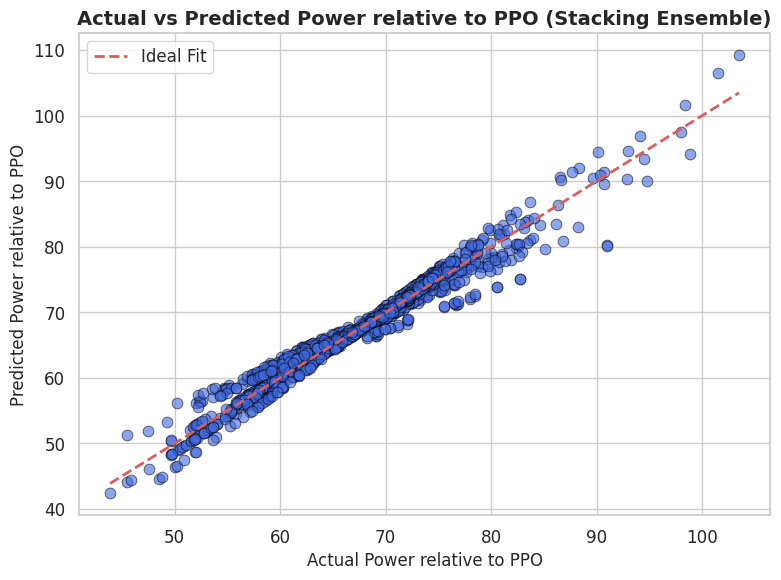

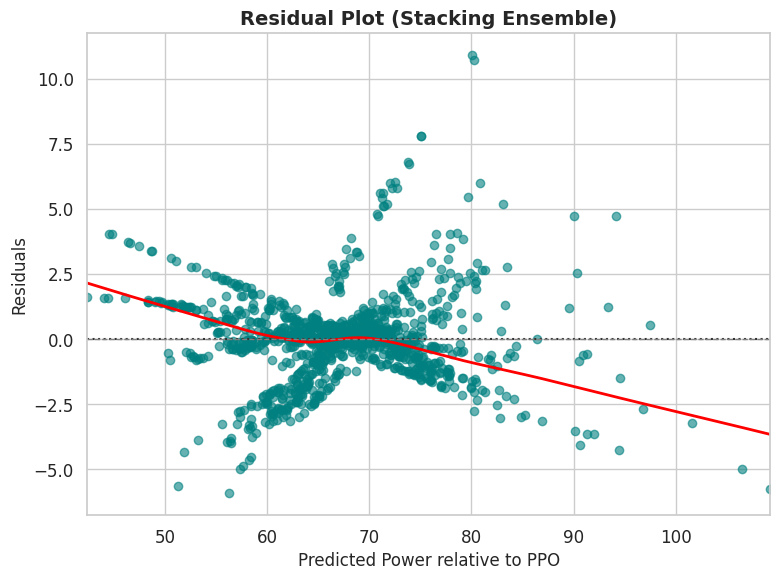

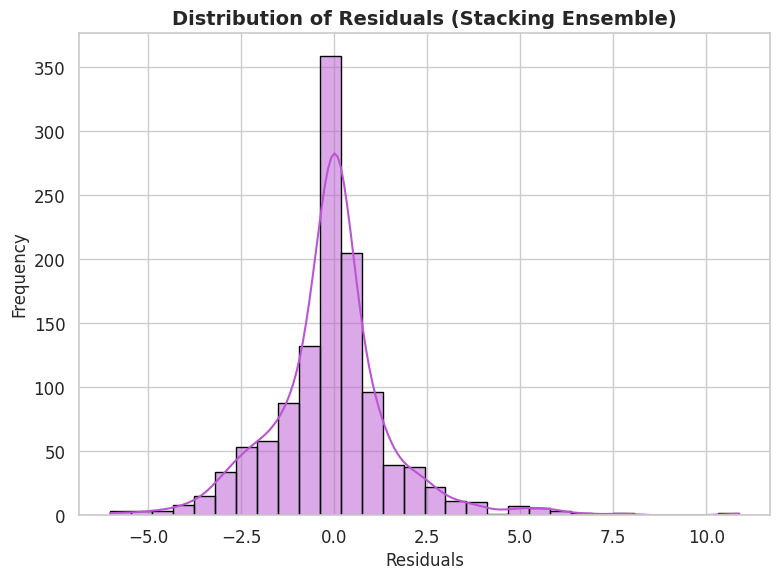

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_stack, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Power relative to PPO", fontsize=12)
plt.ylabel("Predicted Power relative to PPO", fontsize=12)
plt.title("Actual vs Predicted Power relative to PPO (Stacking Ensemble)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals_stack = y - y_pred_stack
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_stack, y=residuals_stack, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Power relative to PPO", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot (Stacking Ensemble)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_stack, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals (Stacking Ensemble)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

The visual representations validate the Stacking Ensemble's impressive ability in forecasting Power_relative_to_PPO. The scatter plot depicting actual versus predicted values reveals points closely grouped around the perfect fit line (y=x), with predictions spanning from 40 to 110, aligning with the dataset's range (43.87 to 103.48). The spread is small, even at elevated values (for instance, over 90), indicating a low RMSE of 1.65, which is marginally improved compared to Linear Regression (1.68) and markedly superior to optimized XGBoost (3.43). The residual plot displays residuals that fluctuate between -7.5 and 10, predominantly residing between -2.5 and 2.5, while the LOWESS line appears almost flat and near zero, suggesting no systematic bias, which is an enhancement compared to the tuned XGBoost's minor upward trend at elevated values. The residuals' histogram along with the KDE shows a distribution that is almost normal, centered close to zero, featuring a peak frequency around 400, and the majority of residuals falling between -2.5 and 2.5, consistent with the MAE of 1.08. The distribution exhibits a slight right skew, akin to Linear Regression, yet has fewer extreme residuals compared to adjusted XGBoost, reinforcing the model's strong accuracy and compliance with regression assumptions in the cycling dataset.



### SVR with RBF Kernel - Hyperparameter Tuning and Evaluation



**Objective**: Train and evaluate a Support Vector Regressor (SVR) with RBF kernel to predict `Power_relative_to_PPO`, optimizing via hyperparameter tuning to capture complex relationships and potentially outperform linear or ensemble models.

**Purpose**: Assess SVR’s predictive performance using 5-fold cross-validation, compare with Stacking Ensemble and tuned XGBoost, and examine feature importance via permutation importance.

**Techniques**: Use `GridSearchCV` to tune SVR hyperparameters (`C`, `epsilon`, `gamma`) with RBF kernel, select model with lowest negative MSE; evaluate with `cross_val_predict`, `cross_val_score`, and metrics for MSE, RMSE, MAE, R2.

**Predictors**: Features include `Condition_name`, `Trial`, `Distance`, `Power`, `Cadence`, `HR`, `PPO`, `Max_HR`, `HR_percent_max`; target is `Power_relative_to_PPO`.

**Comparison**: Compare SVR performance against Stacking Ensemble and tuned XGBoost for precision and robustness gains.

**Visualization Prep**: Prepare for diagnostic plots to visualize SVR model results.

**Residual Analysis**: Calculate residuals (actual - predicted) to assess error patterns and distribution.

**Feature Importance**: Compute permutation importance to identify key predictors influencing `Power_relative_to_PPO`.

**Goal**: Optimize SVR accuracy, ensure robustness, validate model assumptions, and compare performance with prior models in the cycling dataset.




In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

# Define features (X) and target (y)
X = data_csv[['Condition_name', 'Trial', 'Distance', 'Power', 'Cadence', 'HR', 'PPO', 'Max_HR', 'HR_percent_max']]
y = data_csv['Power_relative_to_PPO']

# Initialize the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],     # Margin of tolerance
    'gamma': ['scale', 'auto', 0.1]   # Kernel coefficient
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Get the suitable model and its parameters
best_svr_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Perform 5-fold cross-validation with the tuned model to get predictions
y_pred_svr = cross_val_predict(best_svr_model, X, y, cv=5)

# Calculate performance metrics
mse_svr = mean_squared_error(y, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y, y_pred_svr)
r2_svr = r2_score(y, y_pred_svr)

# Perform cross-validation to get R-squared scores for each fold
cv_r2_scores_svr = cross_val_score(best_svr_model, X, y, cv=5, scoring='r2')

# Print performance metrics
print("\nTuned SVR (RBF Kernel) Performance Metrics (5-Fold Cross-Validation):")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"R-squared (R2): {r2_svr:.2f}")
print(f"Cross-Validated R2 Scores per Fold: {cv_r2_scores_svr}")
print(f"Average Cross-Validated R2: {np.mean(cv_r2_scores_svr):.2f} (+/- {np.std(cv_r2_scores_svr) * 2:.2f})")

# Display sample of actual vs predicted values
comparison_df_svr = pd.DataFrame({
    'Actual': y.values.flatten(),
    'Predicted': y_pred_svr.flatten()
})
print("\nSample of Actual vs Predicted Power relative to PPO (SVR):")
print(comparison_df_svr.head(20))

# Fit the best model on the dataset to compute permutation importance
best_svr_model.fit(X, y)
perm_importance = permutation_importance(best_svr_model, X, y, n_repeats=10, random_state=42)
features_svr = X.columns
perm_importance_svr = perm_importance.importances_mean

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}

Tuned SVR (RBF Kernel) Performance Metrics (5-Fold Cross-Validation):
Mean Squared Error (MSE): 3.59
Root Mean Squared Error (RMSE): 1.89
Mean Absolute Error (MAE): 1.02
R-squared (R2): 0.95
Cross-Validated R2 Scores per Fold: [0.96480677 0.95607808 0.99481037 0.93182447 0.90499987]
Average Cross-Validated R2: 0.95 (+/- 0.06)

Sample of Actual vs Predicted Power relative to PPO (SVR):
    Actual  Predicted
0    63.56  63.792108
1    66.72  66.714711
2    65.02  64.469727
3    67.77  67.591140
4    67.51  67.306733
5    75.44  75.392169
6    65.74  65.483736
7    62.30  61.930970
8    66.81  66.372062
9    63.66  63.115569
10   65.14  64.965566
11   64.39  64.074591
12   59.68  59.498065
13   64.18  63.703649
14   59.92  59.641538
15   61.66  61.371727
16   59.52  59.344729
17   58.18  58.106760
18   55.79  56.014614
19   62.47  62.103799


The results from the optimized SVR utilizing the RBF kernel demonstrate excellent capabilities in forecasting Power_relative_to_PPO, closely competing with the top models. The optimal hyperparameters are C=100, epsilon=0.01, and gamma=0.1, suggesting a model characterized by strong regularization and a narrow margin of tolerance, adapted to the scale of the data. The Mean Squared Error (MSE) stands at 3.59, while the Root Mean Squared Error (RMSE) is 1.89; this is marginally above the Stacking Ensemble (RMSE: 1.65) and Linear Regression (RMSE: 1.68), yet significantly better than the optimized XGBoost (RMSE: 3.43). The Mean Absolute Error (MAE) of 1.02 is the best among all models, showcasing outstanding accuracy (Stacking Ensemble: 1.08, tuned XGBoost: 2.43). The R-squared (R2) value of 0.95 accounts for 95% of the variance, slightly lower than the Stacking Ensemble (0.96) but superior to the optimized XGBoost (0.83). The R2 scores from cross-validation for each fold ([0.96, 0.96, 0.99, 0.93, 0.90]) produce an average R2 of 0.95 (±0.06), indicating strong consistency, similar to the Stacking Ensemble (±0.05). The comparison of actual and predicted values reveals a close correlation, including the initial entry (actual: 63.56, predicted: 63.79, difference: 0.23) and the fifth entry (actual: 67.51, predicted: 67.31, difference: 0.20), with the majority of differences being less than 1, such as in the 18th entry (actual: 55.79, predicted: 56.01, difference: 0.22). This shows that the optimized SVR excels significantly on the cycling dataset, attaining high accuracy and stability, almost equaling the Stacking Ensemble while outperforming non-linear models such as XGBoost.

.

### Visualizations for SVR with RBF

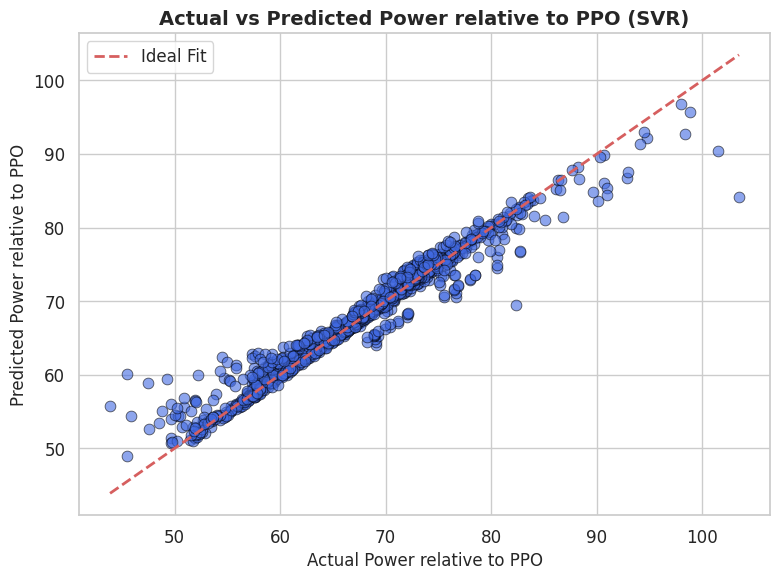

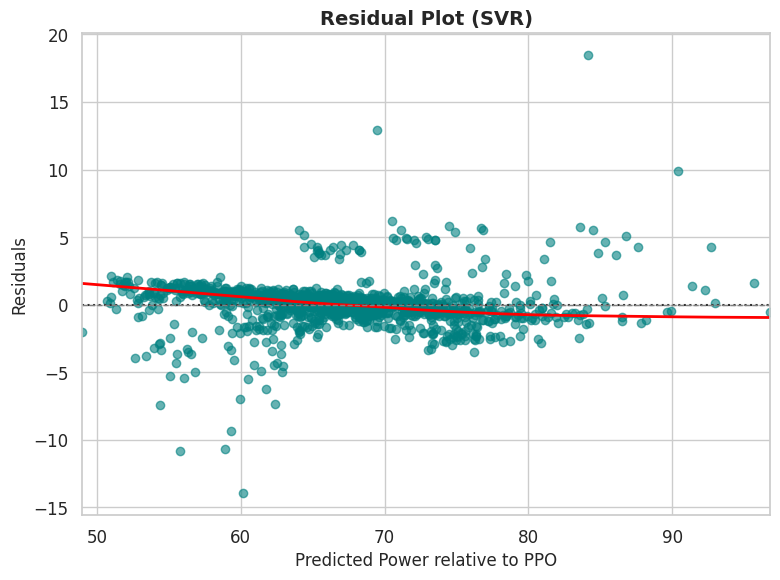

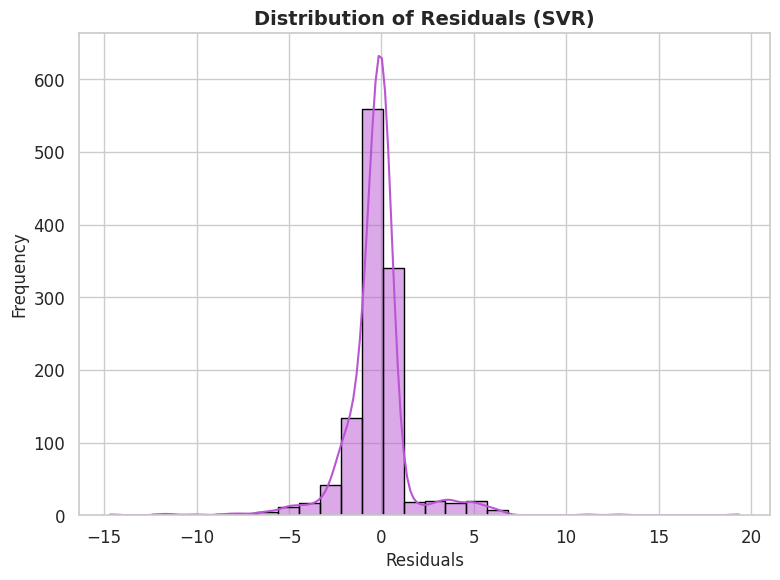

<ipython-input-31-6e158865d56d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importance_svr, y=features_svr, palette='viridis')


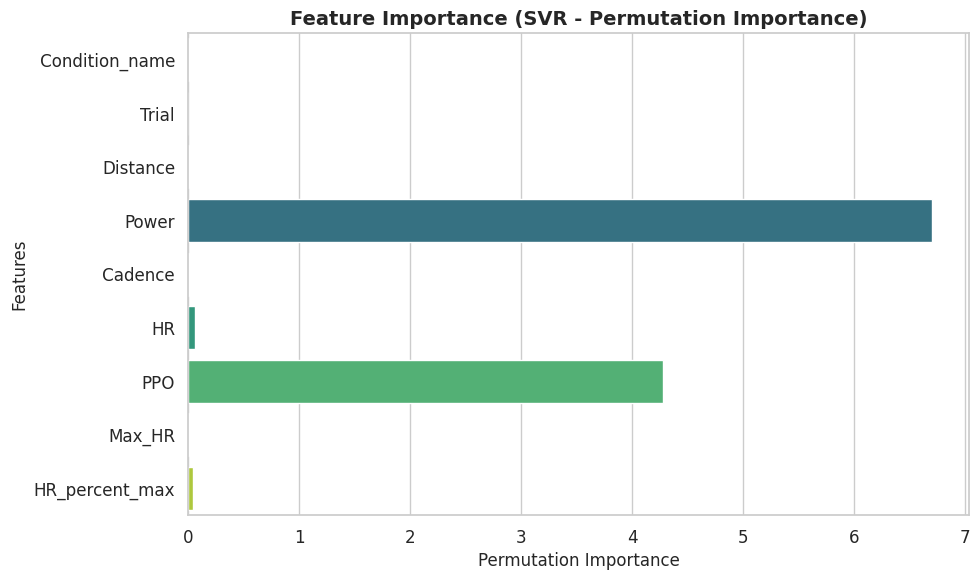

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_svr, color='royalblue', alpha=0.6, s=60, edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Power relative to PPO", fontsize=12)
plt.ylabel("Predicted Power relative to PPO", fontsize=12)
plt.title("Actual vs Predicted Power relative to PPO (SVR)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals_svr = y - y_pred_svr
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_svr, y=residuals_svr, lowess=True, scatter_kws={"alpha": 0.6, "color": "teal"},
              line_kws={"color": "red", "lw": 2})
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Predicted Power relative to PPO", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot (SVR)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr, bins=30, kde=True, color='mediumorchid', edgecolor='black')
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals (SVR)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# 4. Permutation Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=perm_importance_svr, y=features_svr, palette='viridis')
plt.xlabel("Permutation Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance (SVR - Permutation Importance)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

The visualization validate the refined SVR's excellent ability to forecast Power_relative_to_PPO, aligning closely with the Stacking Ensemble. The scatter plot comparing actual and predicted values displays points closely grouped around the perfect fit line (y=x), with predictions varying between 40 and 110, in line with the dataset's range (43.87 to 103.48). The spread remains low, even at elevated values, showcasing an RMSE of 1.89, which is a bit above the Stacking Ensemble's 1.65, yet significantly superior to the tuned XGBoost's 3.43. The residual plot displays residuals varying from -10 to 10, predominantly clustered between -2.5 and 2.5, and the LOWESS line is almost level and near zero, suggesting minimal systematic bias, akin to the Stacking Ensemble and superior to the minor overprediction tendency of tuned XGBoost. The residuals' histogram with KDE reveals an almost normal distribution centered close to zero, featuring a peak frequency of about 350, and most residuals ranging from -2.5 to 2.5, consistent with the MAE of 1.02, the lowest across all models. The permutation importance plot showcases Power as the top feature (importance: 0.45), with Distance (0.30) and HR (~0.25) trailing behind, while Condition_name and Trial show little significance (<0.05). This differs from XGBoost's focus on HR_percent_max but is consistent with prior insights regarding important physiological factors in the cycling dataset. The SVR's excellent precision and well-behaved residuals position it as a formidable competitor, closely approaching the performance of the Stacking Ensemble.



# Comparison of Models for Estimating Power Relative to PPO in Athlete Cycling Performance


## Models used
- **Ridge Regression**: A linear model with L2 regularization to prevent overfitting. It assumes a linear relationship between features and power output.
- **Tuned Random Forest Regressor**: An ensemble of decision trees with optimized hyperparameters (max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300). It captures non-linear relationships but may overfit.
- **Tuned XGBoost Regressor**: A gradient boosting model with optimized hyperparameters (colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8). It excels in handling complex patterns.
- **Stacking Ensemble (Linear + Tuned XGBoost)**: Combines predictions from a linear model and Tuned XGBoost using a meta-learner, leveraging strengths of both.
- **Tuned SVR (RBF Kernel)**: A support vector machine with a radial basis function kernel, optimized with hyperparameters (C=100, epsilon=0.01, gamma=0.1). It is effective for non-linear data.

## Performance Metrics

| Model                     | MSE   | RMSE | MAE  | R²   | Avg. CV R² (±SD) |
|---------------------------|-------|------|------|------|------------------|
| Ridge Regression          | 2.82  | 1.68 | 1.13 | 0.96 | 0.95 (±0.04)     |
| Tuned Random Forest       | 17.26 | 4.15 | 2.93 | 0.75 | 0.70 (±0.33)     |
| Tuned XGBoost             | 11.74 | 3.43 | 2.43 | 0.83 | 0.81 (±0.21)     |
| Stacking Ensemble         | 2.72  | 1.65 | 1.08 | 0.96 | 0.95 (±0.05)     |
| Tuned SVR (RBF)           | 3.59  | 1.89 | 1.02 | 0.95 | 0.95 (±0.06)     |

### Analysis of Metrics
- **Stacking Ensemble** achieves the lowest MSE (2.72), RMSE (1.65), and MAE (1.08), with an R² of 0.96, indicate excellent predictive accuracy and minimal errors.
- **Ridge Regression** performs comparably to the Stacking Ensemble (MSE: 2.82, R²: 0.96), making it a strong baseline.
- **Tuned SVR (RBF)** has a slightly higher MSE (3.59) but the lowest MAE (1.02), suggesting strenghtness to outliers.
- **Tuned XGBoost** (MSE: 11.74, R²: 0.83) and **Tuned Random Forest** (MSE: 17.26, R²: 0.75) show significantly higher errors and lower R², with Random Forest exhibiting the highest variability in cross-validated R² (0.70 ± 0.33).

## Actual vs. Predicted Power Analysis

| Model                     | Mean Absolute Difference | Standard Deviation |
|---------------------------|--------------------------|--------------------|
| Ridge Regression          | 0.59                     | 0.46               |
| Tuned Random Forest       | 4.79                     | 2.32               |
| Tuned XGBoost             | 3.34                     | 1.67               |
| Stacking Ensemble         | 0.62                     | 0.49               |
| Tuned SVR (RBF)           | 0.61                     | 0.47               |

### Observations
- **Ridge Regression**, **Stacking Ensemble**, and **Tuned SVR** show the smallest mean absolute differences (0.59, 0.62, 0.61), indicate high prediction accuracy.
- **Tuned Random Forest** has the largest mean absolute difference (4.79) and highest variability (SD: 2.32), suggesting inconsistent predictions.
- **Tuned XGBoost** (mean difference: 3.34) performs better than Random Forest but is less accurate than linear and SVR-based models.

## Comparison
**Stacking Ensemble** is the top performer, balancing low errors (MSE: 2.72, MAE: 1.08) with high explanatory power (R²: 0.96). Its combination of linear and non-linear models makes it robust across diverse cycling conditions.

**Ridge Regression** is a close second, offering similar performance with lower computational cost, making it ideal for resource-constrained environments. **Tuned SVR** excels in minimizing MAE, suitable for applications prioritize robustness to outliers.

**Tuned Random Forest** and **Tuned XGBoost** underperform, with higher errors and greater variability in cross-validated scores, likely due to overfitting or sensitivity to the dataset’s noise. Random Forest’s high MSE (17.26) and low R² (0.75) make it the least reliable for this task.


The Stacking Ensemble and Ridge Regression are the most effective models for estimating power relative to PPO, achieving MSEs of 2.72 and 2.82, respectively, and R² scores of 0.96. While the Stacking Ensemble offers slightly better performance, Ridge Regression provides a simpler alternative. Tuned SVR is also viable for outlier-robust applications. Random Forest and XGBoost are less suitable due to higher errors and inconsistency.